# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*2 - Feature Selection & Modeling*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. [Product Category #1](#Product-Category-#1) <br><br>

In [1]:
## CELL TYPES (remover depois)

<div class="alert-danger">
    
test

<div class="alert-warning">
    
test

<div class="alert-info">
    
test

# 1. Import Libraries & Data

In [65]:
import os
import pandas as pd

# Models
import xgboost as xgb
import lightgbm as lgb

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


# External Files
import fs_modelling as fs
import utils as u

**Data**

In [9]:
X_train = pd.read_csv('./data/X_train_data/X_train.csv', index_col = 'Unnamed: 0')
X_val = pd.read_csv('./data/X_val_data/X_val.csv', index_col = 'Unnamed: 0')

def import_all_csvs(folder):
    """Imports all CSV files from a given folder and tracks variable names."""
    var_list = []

    for file in os.listdir(folder):
        if file.endswith('.csv'):
            df_name = file.replace('.csv', '')
            df = pd.read_csv(os.path.join(folder, file), index_col='Unnamed: 0')
            globals()[df_name] = df  # Save as a global variable
            var_list.append(df_name)  # Track variable name
    
    return var_list

# Import each CSV file as individual DataFrames
y_train_list = import_all_csvs('data/y_train_data')
y_val_list = import_all_csvs('data/y_val_data')

**Scaling**

In [12]:
X_train_scaled, X_val_scaled = fs.scale_data(X_train, 
                                          X_val, 
                                          scaler_type='minmax')

## 2.1 Feature Selection

In [17]:
selected_features3 = {}

for y_train_name in y_train_list:
    y_train = globals()[y_train_name]

    selected_features3[y_train_name] = fs.feature_selection(
        X_train_scaled, 
        y_train, 
        method='all', # all but LASSO because it was mostly selecting 0 features
        rfe_model=lgb.LGBMRegressor(verbose = -1), # use fo lgbm verbose = -1
        mi_threshold = 0.05,
        plot=False
    )
    
    print('\n Next Feature... \n')

Selected 72 features by correlation
Selected 20 features by RFECV
Selected 44 features by importance with threshold 0.0072992700729927005
Selected 22 features by Mutual Information
Selected 2 features that intersect across all methods

 Next Feature... 

Selected 72 features by correlation
Selected 20 features by RFECV
Selected 31 features by importance with threshold 0.0072992700729927005
Selected 63 features by Mutual Information
Selected 5 features that intersect across all methods

 Next Feature... 

Selected 72 features by correlation
Selected 20 features by RFECV
Selected 28 features by importance with threshold 0.0072992700729927005
Selected 49 features by Mutual Information
Selected 3 features that intersect across all methods

 Next Feature... 

Selected 72 features by correlation
Selected 20 features by RFECV
Selected 28 features by importance with threshold 0.0072992700729927005
Selected 27 features by Mutual Information
Selected 3 features that intersect across all methods


**Final Features**

In [13]:
u.fs_mm_xgb

{'y_train_36': ['#14_Lag_1', '#9_Lag_1', '#4_Lag_1'],
 'y_train_8': ['#36_Lag_1',
  'stock_price_change',
  'CHI Production Index',
  'SWI Production Index',
  '#36_Lag_12'],
 'y_train_20': ['#36_RollingMean_12', '#12_Lag_1', 'BC_CHI'],
 'y_train_9': ['#20_Lag_1', '#36_Lag_1', '#4_Lag_1', '#13_Lag_1'],
 'y_train_4': ['#12_Lag_12',
  'Buildings_Ger',
  'GER Production Index',
  '#12_RollingMean_3',
  '#3_Lag_1',
  '#1_Lag_1',
  'FRA Production Index',
  'BC_GER',
  '(W) Price of Base Metals',
  '#4_RollingMean_6',
  '#16_RollingMean_3'],
 'y_train_11': ['#3_Lag_1',
  '#14_Lag_1',
  'UK EE Producer Prices',
  'Fossil_Ita'],
 'y_train_5': ['#1_Lag_1',
  'Fossil_Swi',
  '#20_Lag_1',
  'Fossil_US',
  'TotalDaysInMonth',
  'Fossil_UK'],
 'y_train_12': ['#9_Lag_1',
  '#12_RollingMean_3',
  '#6_Lag_1',
  '#9_RollingMean_12',
  'Clean_Fra',
  '#20_Lag_1'],
 'y_train_13': ['#8_Lag_3', 'Clean_UK', '#13_RollingMean_3', 'Clean_US'],
 'y_train_6': ['Clean_Ita',
  'Fossil_Fra',
  '#20_Lag_1',
  '#13_

## 2.2 Model Training

### ARIMA


 Training model for Product Category 36


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


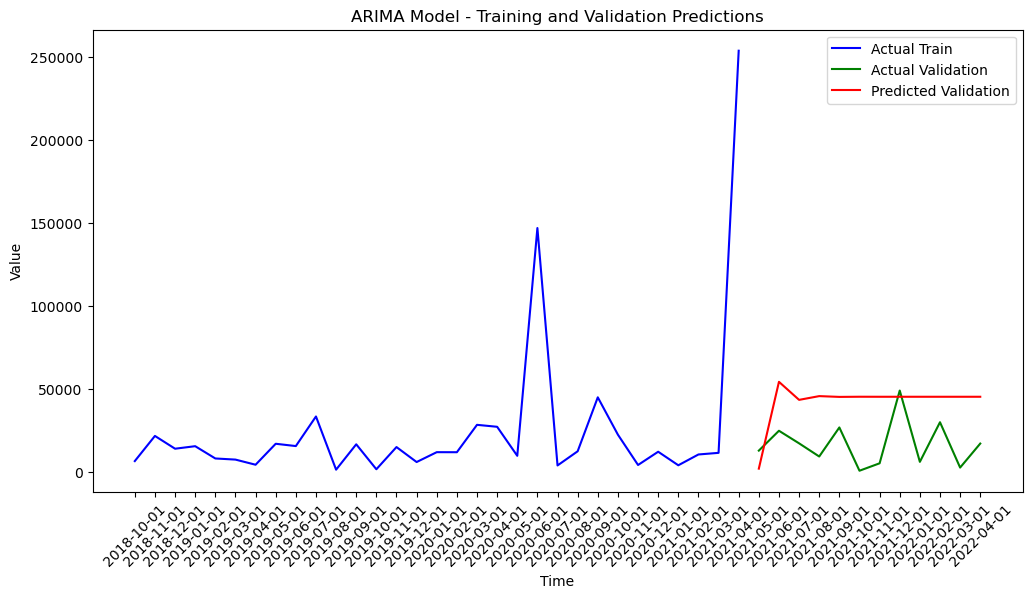

Results appended to ./modelling_csvs/36_results.csv

 Training model for Product Category 8


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


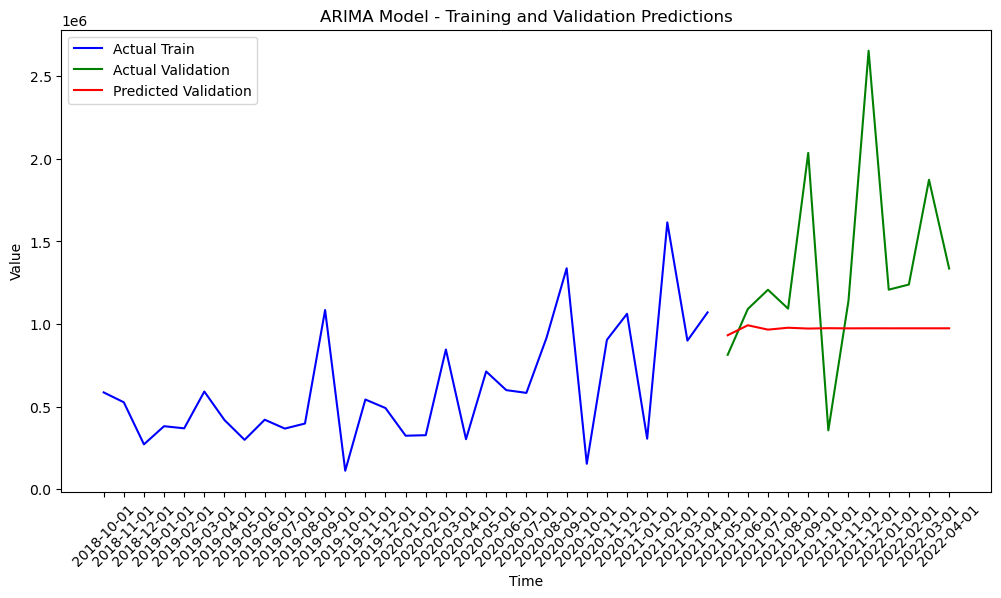

Results appended to ./modelling_csvs/8_results.csv

 Training model for Product Category 20


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


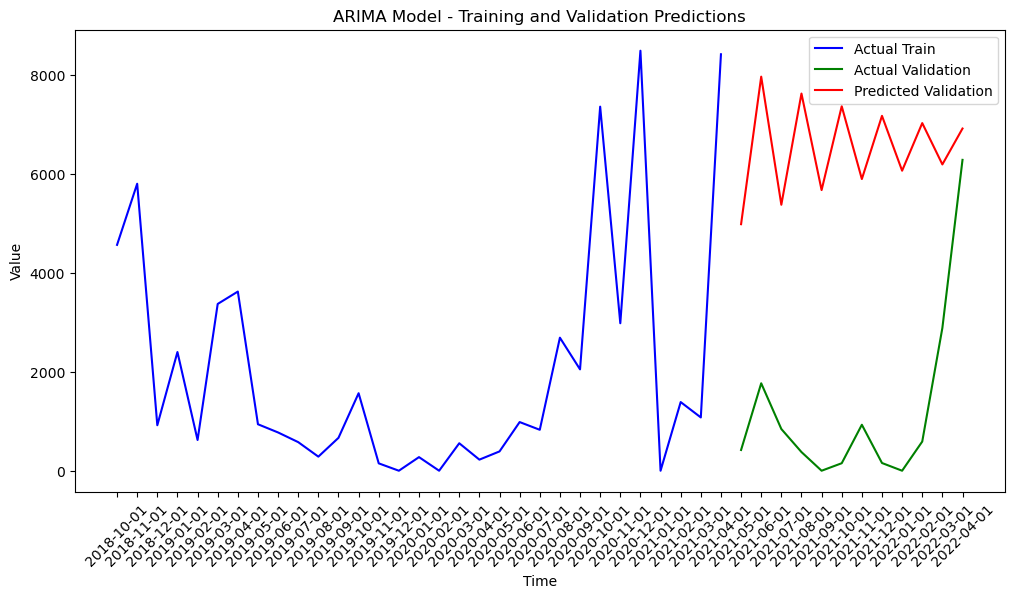

Results appended to ./modelling_csvs/20_results.csv

 Training model for Product Category 9


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


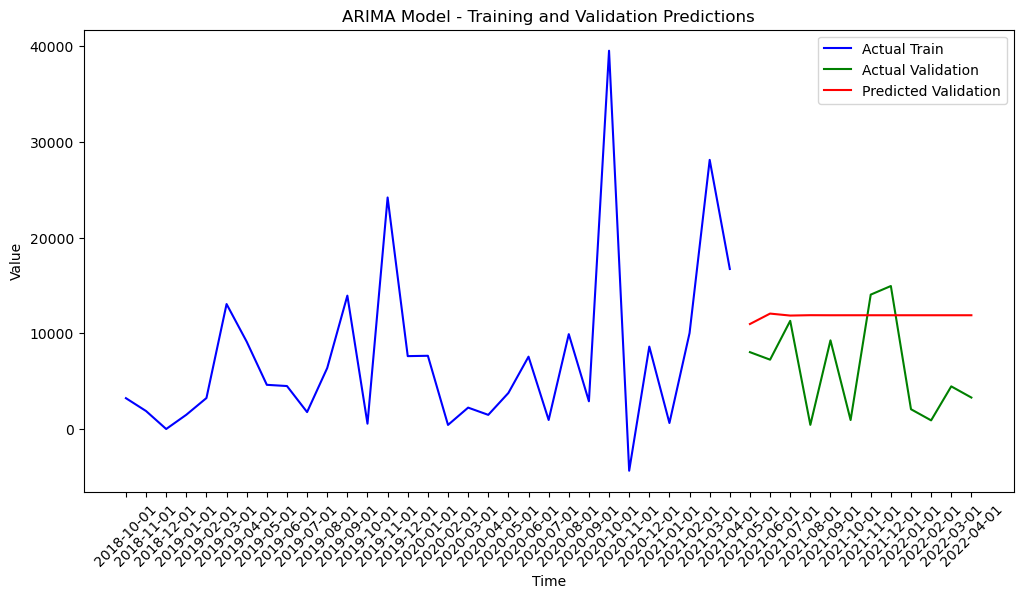

Results appended to ./modelling_csvs/9_results.csv

 Training model for Product Category 4


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


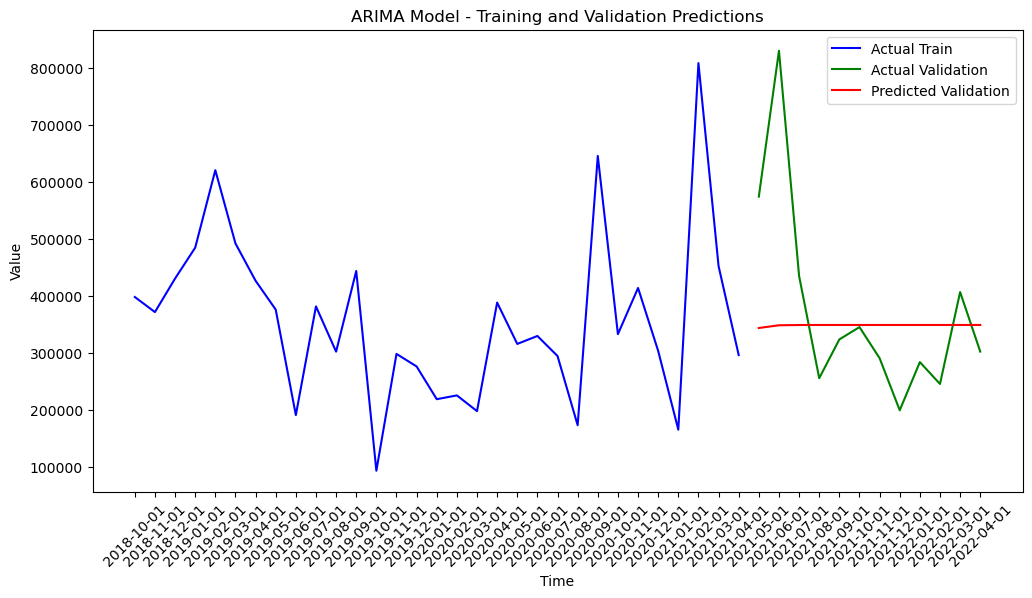

Results appended to ./modelling_csvs/4_results.csv

 Training model for Product Category 11


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


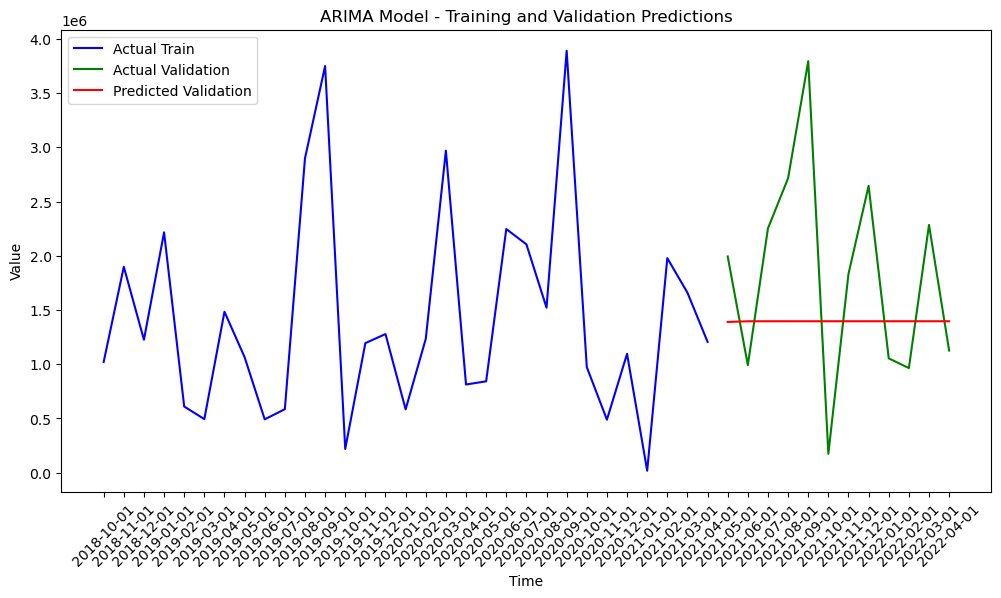

Results appended to ./modelling_csvs/11_results.csv

 Training model for Product Category 5


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


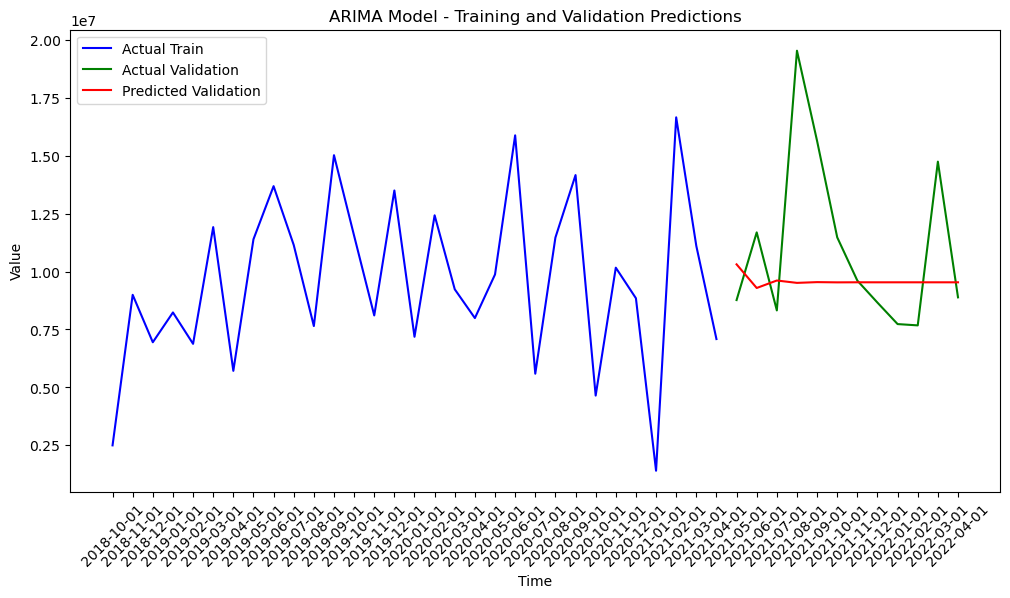

Results appended to ./modelling_csvs/5_results.csv

 Training model for Product Category 12


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


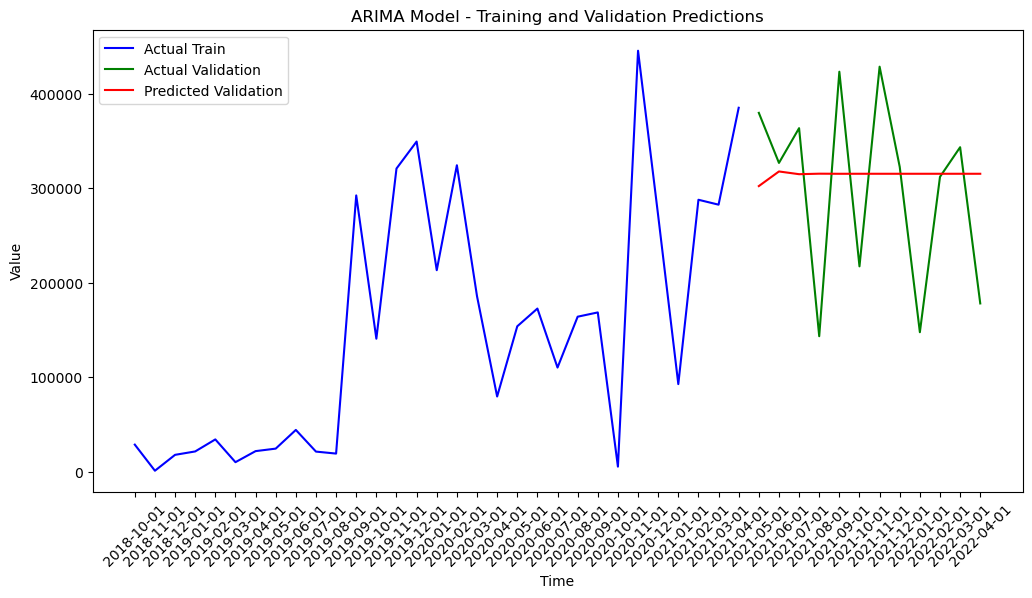

Results appended to ./modelling_csvs/12_results.csv

 Training model for Product Category 13


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


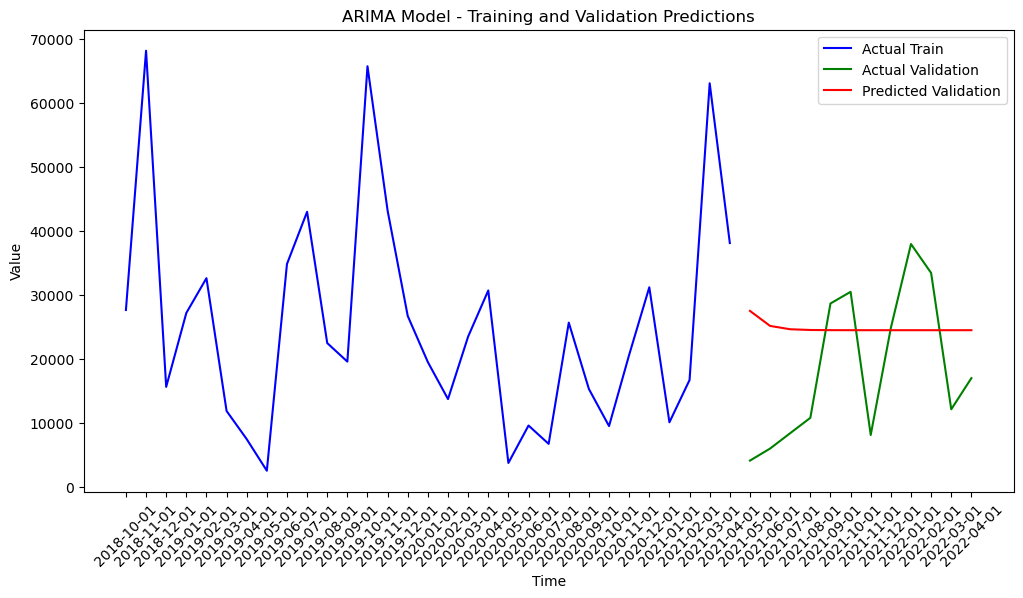

Results appended to ./modelling_csvs/13_results.csv

 Training model for Product Category 6


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


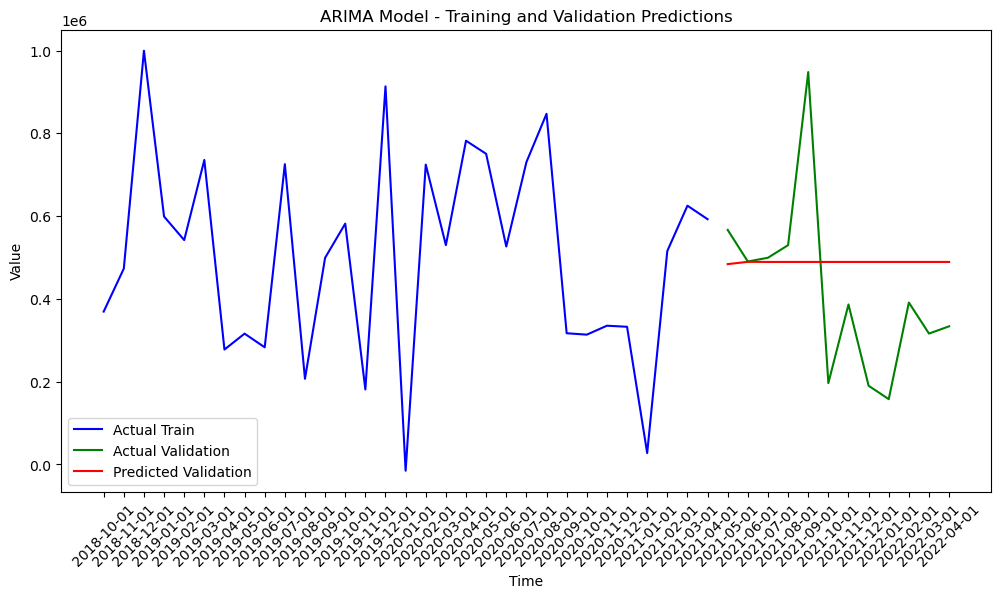

Results appended to ./modelling_csvs/6_results.csv

 Training model for Product Category 16


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


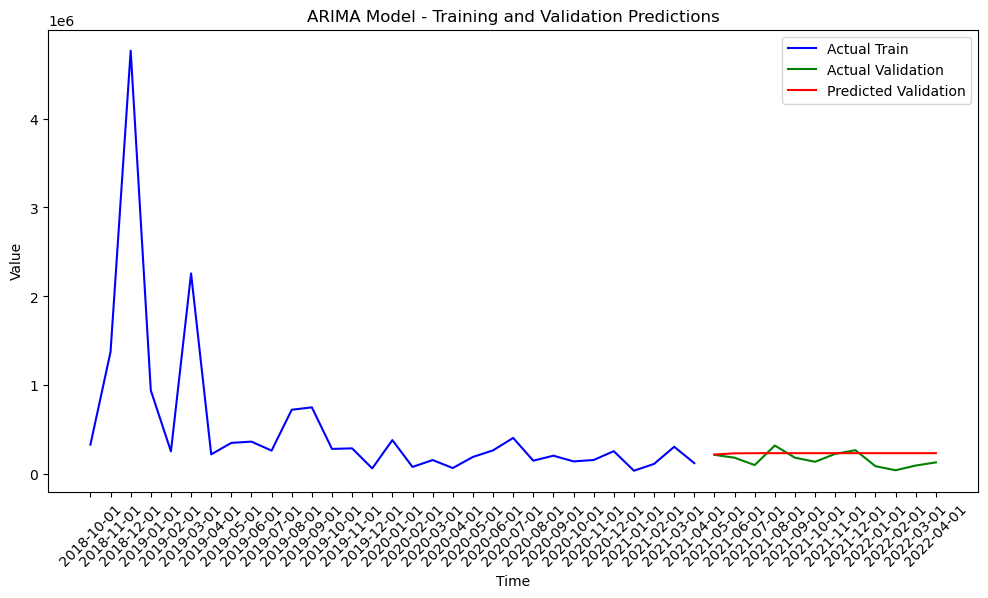

Results appended to ./modelling_csvs/16_results.csv

 Training model for Product Category 3


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


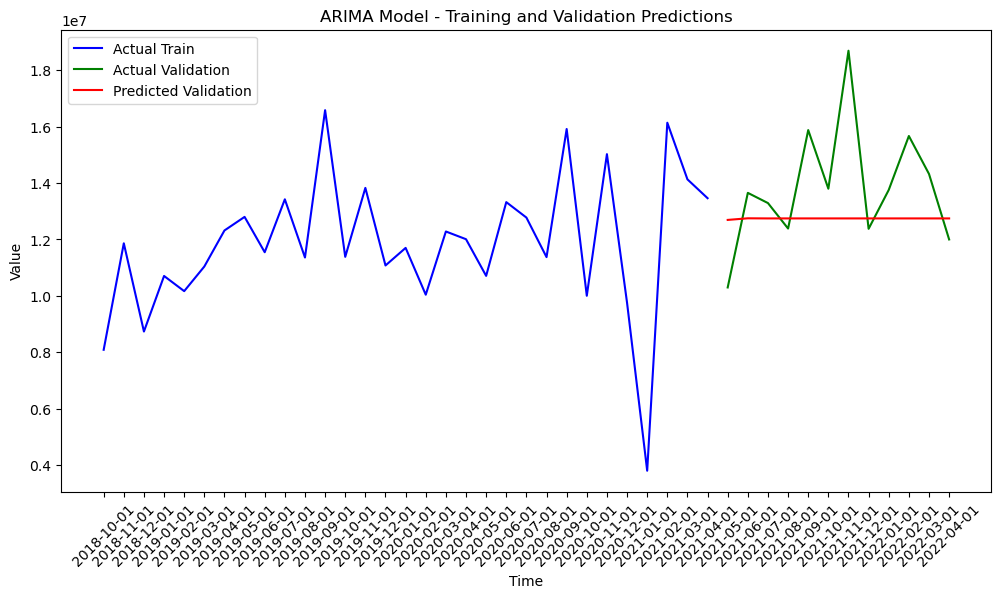

Results appended to ./modelling_csvs/3_results.csv

 Training model for Product Category 1


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


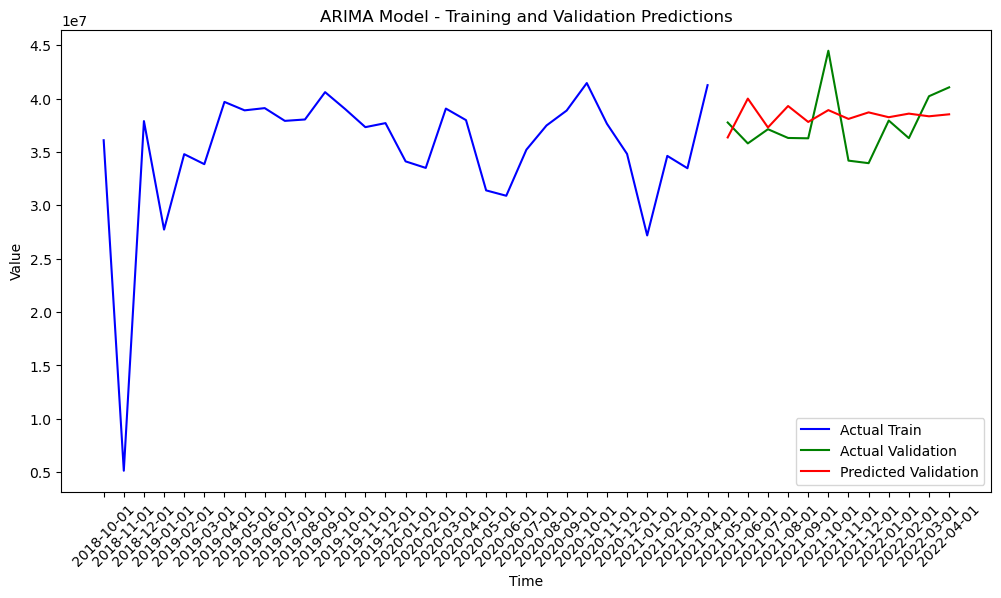

Results appended to ./modelling_csvs/1_results.csv

 Training model for Product Category 14


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


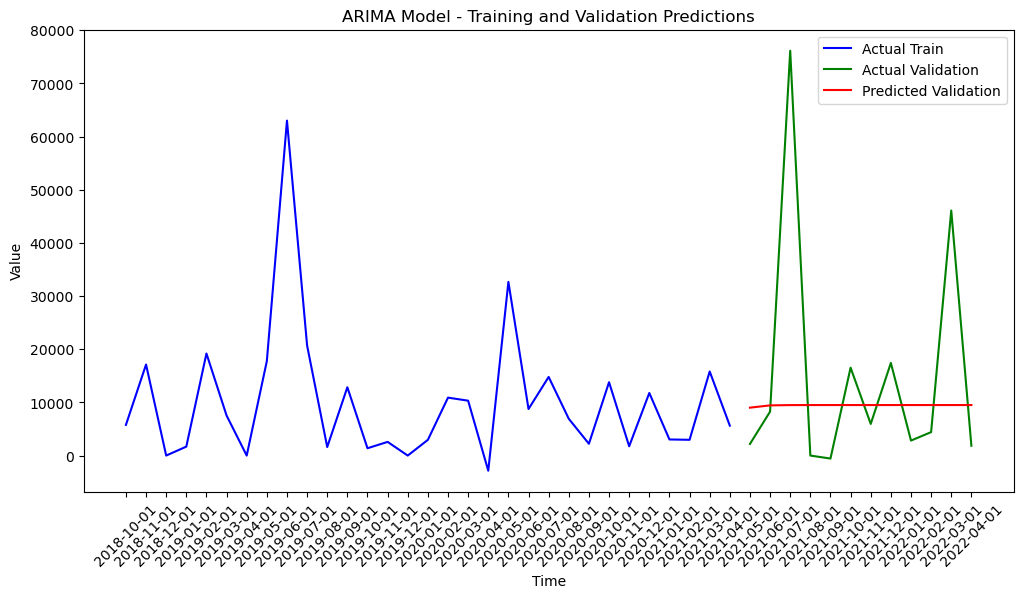

Results appended to ./modelling_csvs/14_results.csv


In [14]:
# Empty dicts
model_fits = {}
val_preds = {}
model_summaries = {}

# ARIMA for all Product Categ
for target_name, selected_features in u.fs_mm_xgb.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the ARIMA model using fs.stats_models method
    model_fits[target_number], val_preds[target_number], model_summaries[target_number] = fs.stats_models(
        'arima', X_train_scaled, X_val_scaled, 
        target_train, target_val, order=(1, 1, 1),
        plot=True,
        csv_path=f'./modelling_csvs/{target_number}_results.csv'
    )

In [22]:
#model_fit_ar, val_preds_ar, model_summary_ar = fs.stats_models('arima', X_train_scaled, X_val_scaled, 
#                                     y_train_1, y_val_1, order=(1,1,3),
#                                     plot = False, 
#                                     csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [16]:
steps_ahead = 30  # Number of future steps you want to predict
future_preds = model_fits['36'].forecast(steps=steps_ahead)
print(future_preds)


2021-05-01     1923.405189
2021-06-01    54188.938431
2021-07-01    43331.492644
2021-08-01    45586.977697
2021-09-01    45118.431694
2021-10-01    45215.765683
2021-11-01    45195.545885
2021-12-01    45199.746270
2022-01-01    45198.873698
2022-02-01    45199.054963
2022-03-01    45199.017308
2022-04-01    45199.025130
2022-05-01    45199.023505
2022-06-01    45199.023843
2022-07-01    45199.023772
2022-08-01    45199.023787
2022-09-01    45199.023784
2022-10-01    45199.023785
2022-11-01    45199.023785
2022-12-01    45199.023785
2023-01-01    45199.023785
2023-02-01    45199.023785
2023-03-01    45199.023785
2023-04-01    45199.023785
2023-05-01    45199.023785
2023-06-01    45199.023785
2023-07-01    45199.023785
2023-08-01    45199.023785
2023-09-01    45199.023785
2023-10-01    45199.023785
Freq: MS, Name: predicted_mean, dtype: float64


### SARIMAX


 Training model for Product Category 36


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


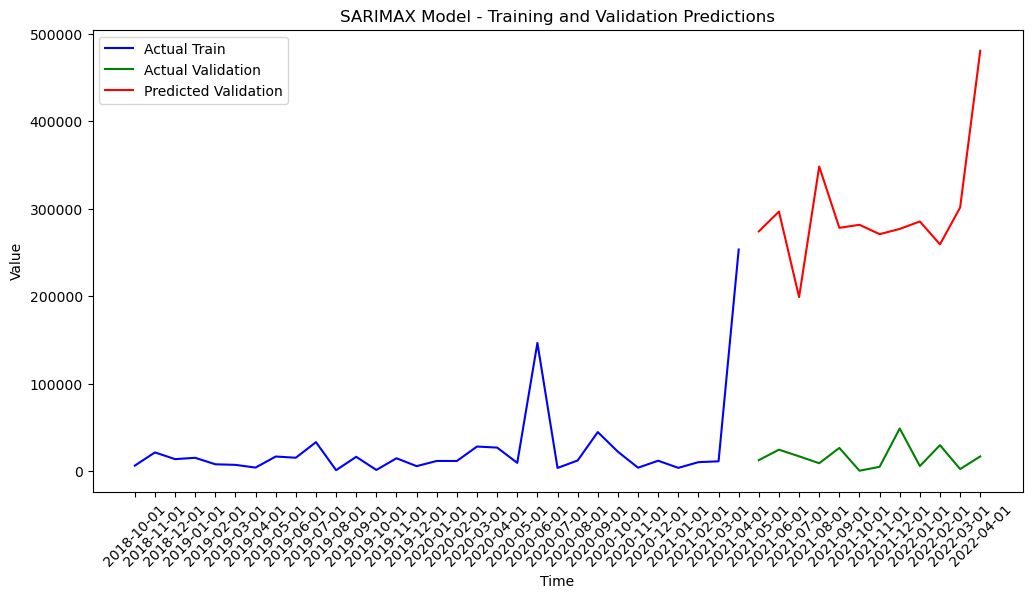

Results appended to ./modelling_csvs/36_results.csv

 Training model for Product Category 8


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


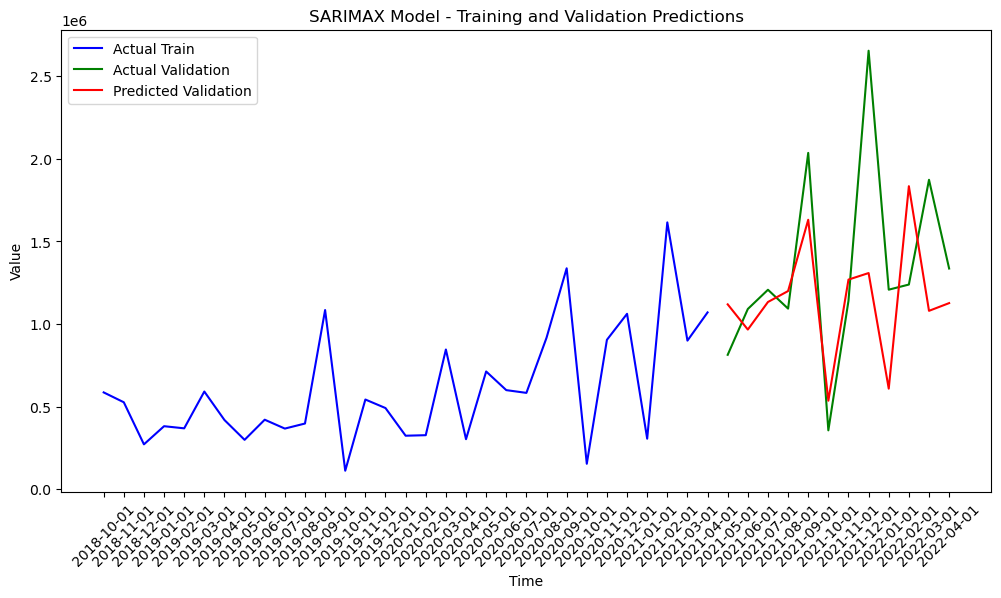

Results appended to ./modelling_csvs/8_results.csv

 Training model for Product Category 20


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


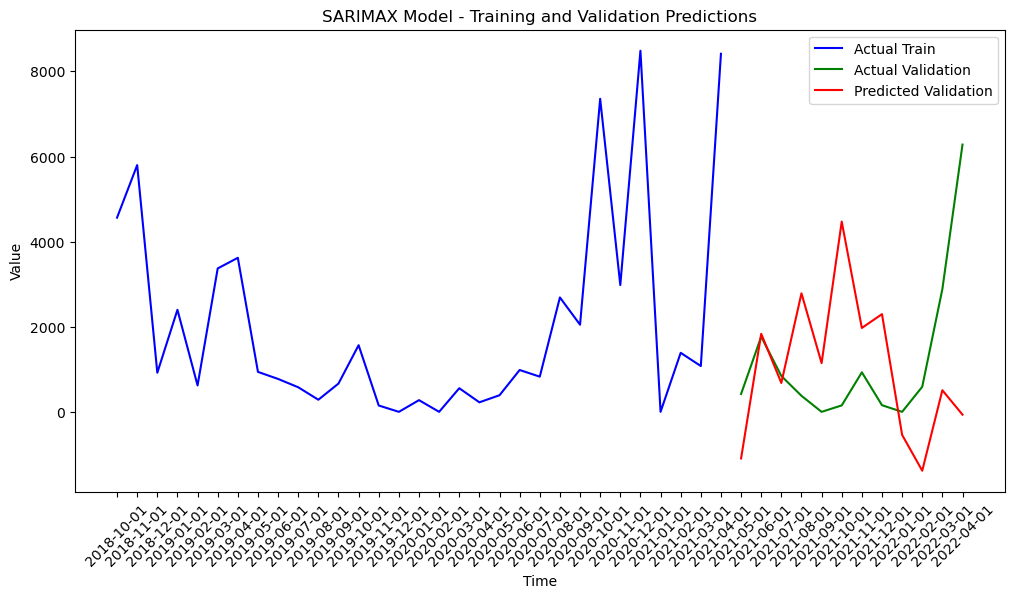

Results appended to ./modelling_csvs/20_results.csv

 Training model for Product Category 9


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


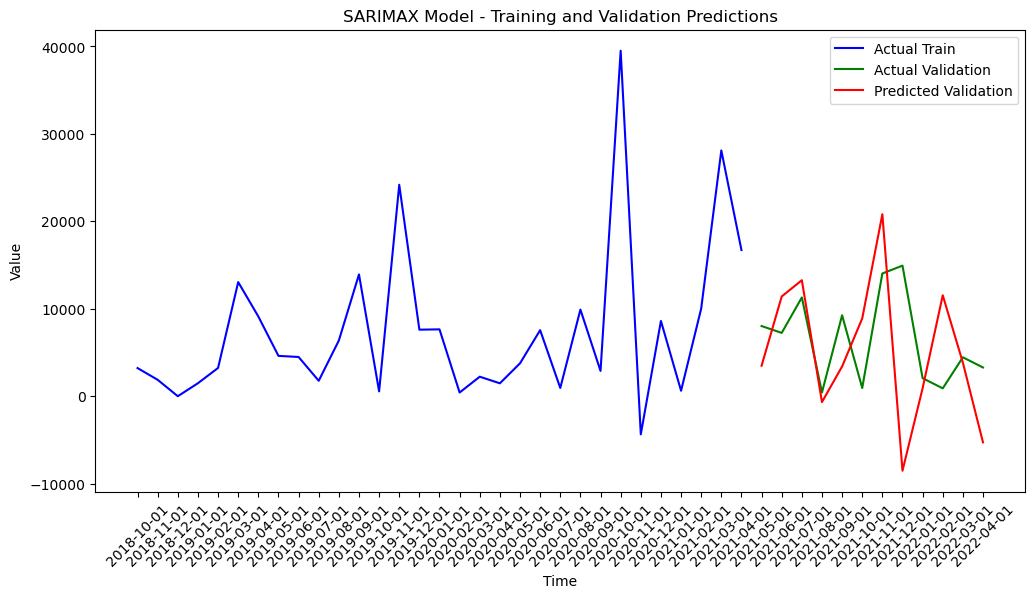

Results appended to ./modelling_csvs/9_results.csv

 Training model for Product Category 4


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


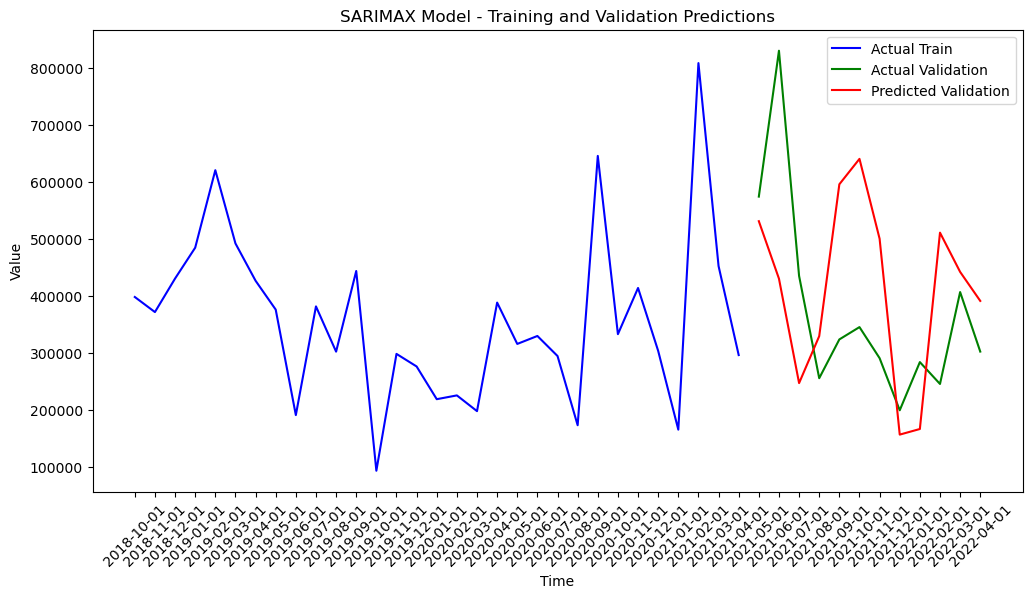

Results appended to ./modelling_csvs/4_results.csv

 Training model for Product Category 11


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


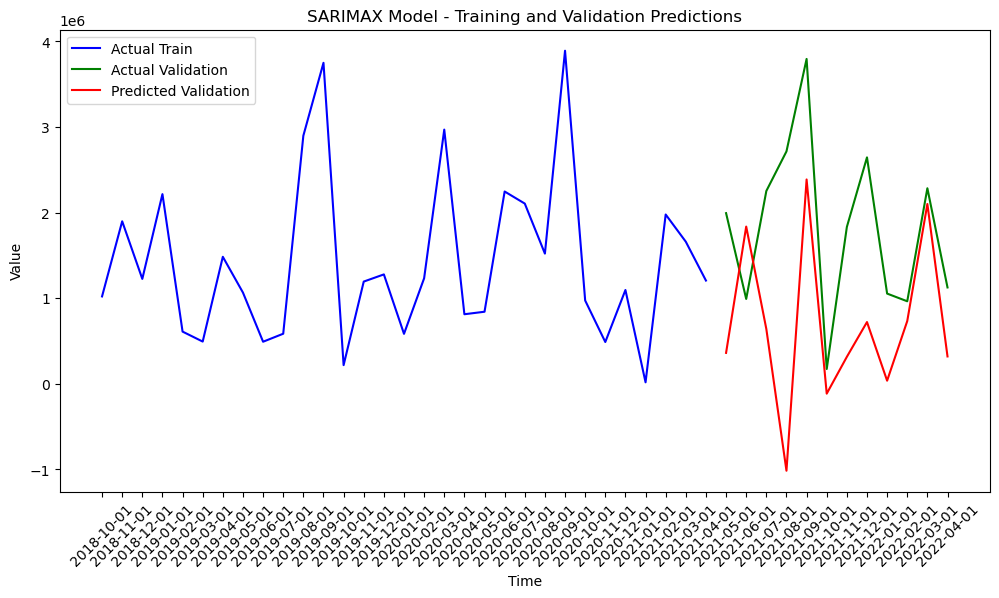

Results appended to ./modelling_csvs/11_results.csv

 Training model for Product Category 5


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


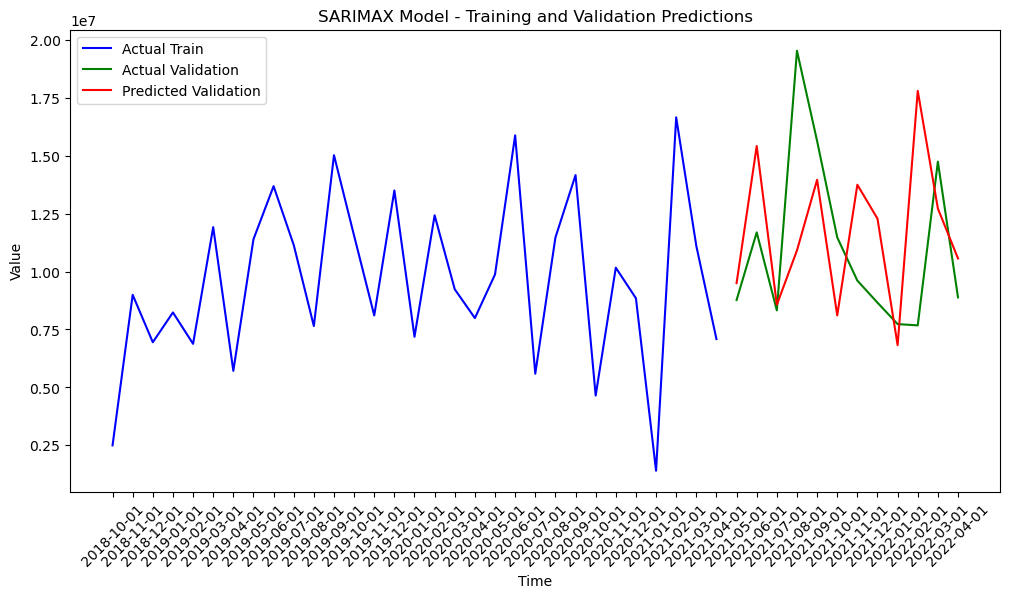

Results appended to ./modelling_csvs/5_results.csv

 Training model for Product Category 12


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


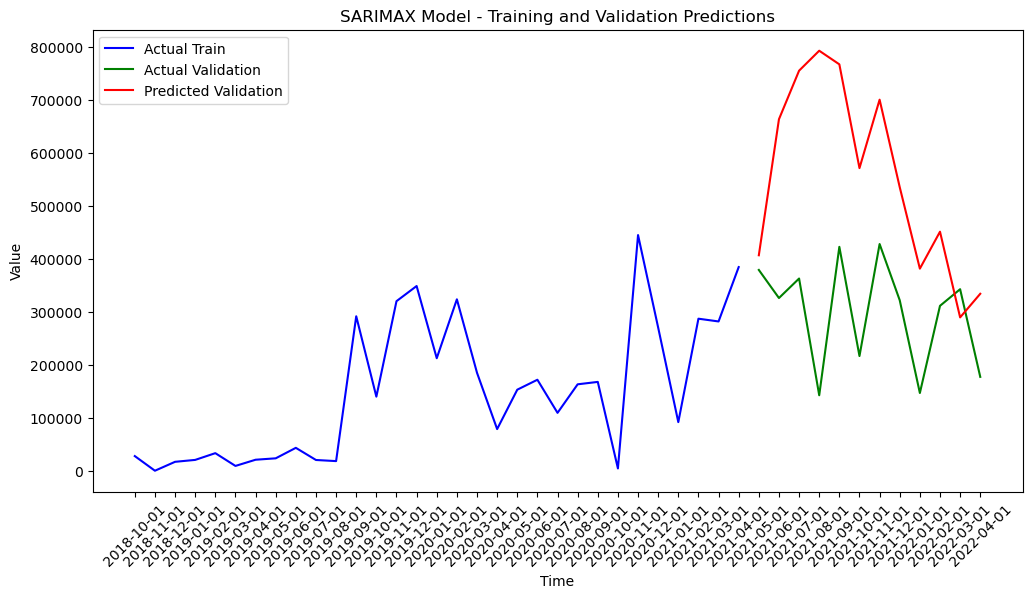

Results appended to ./modelling_csvs/12_results.csv

 Training model for Product Category 13


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


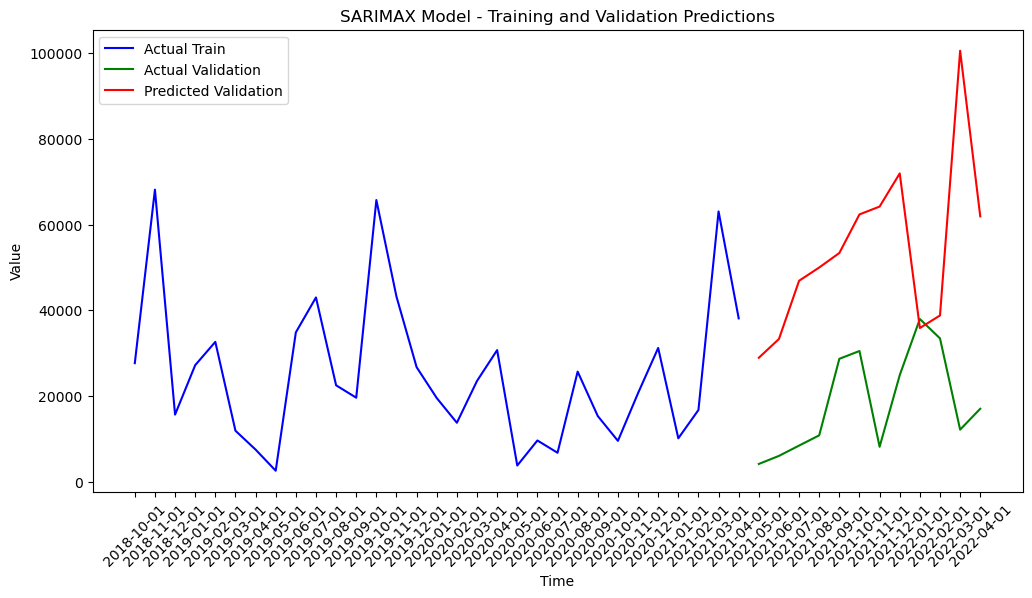

Results appended to ./modelling_csvs/13_results.csv

 Training model for Product Category 6


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


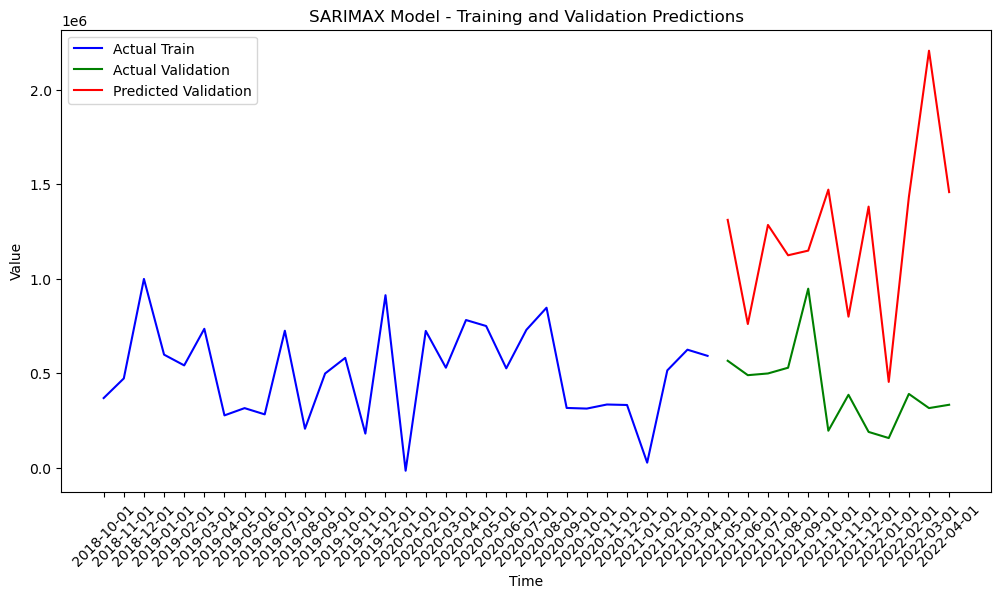

Results appended to ./modelling_csvs/6_results.csv

 Training model for Product Category 16


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


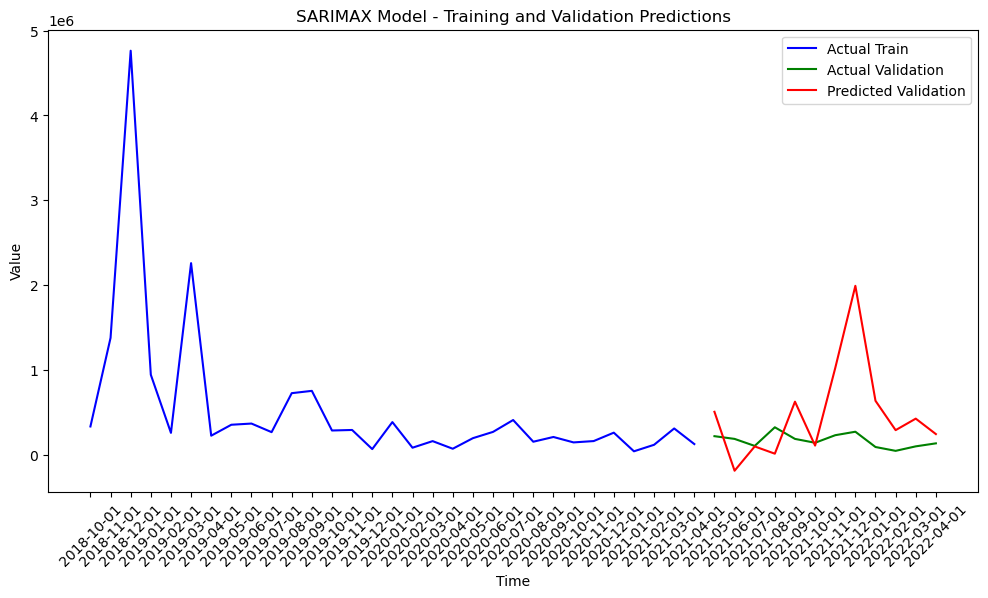

Results appended to ./modelling_csvs/16_results.csv

 Training model for Product Category 3


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


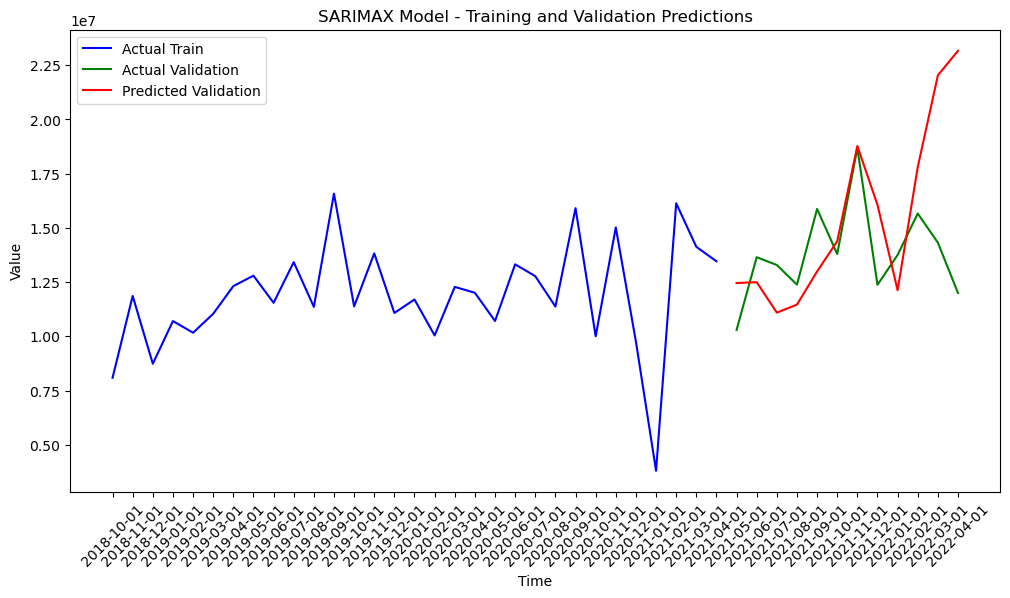

Results appended to ./modelling_csvs/3_results.csv

 Training model for Product Category 1


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


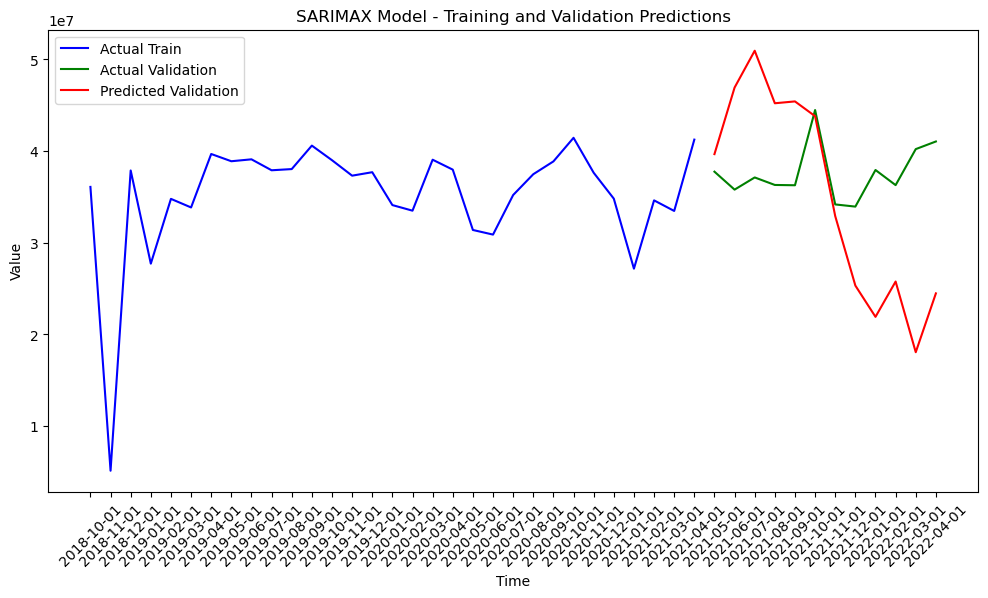

Results appended to ./modelling_csvs/1_results.csv

 Training model for Product Category 14


/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


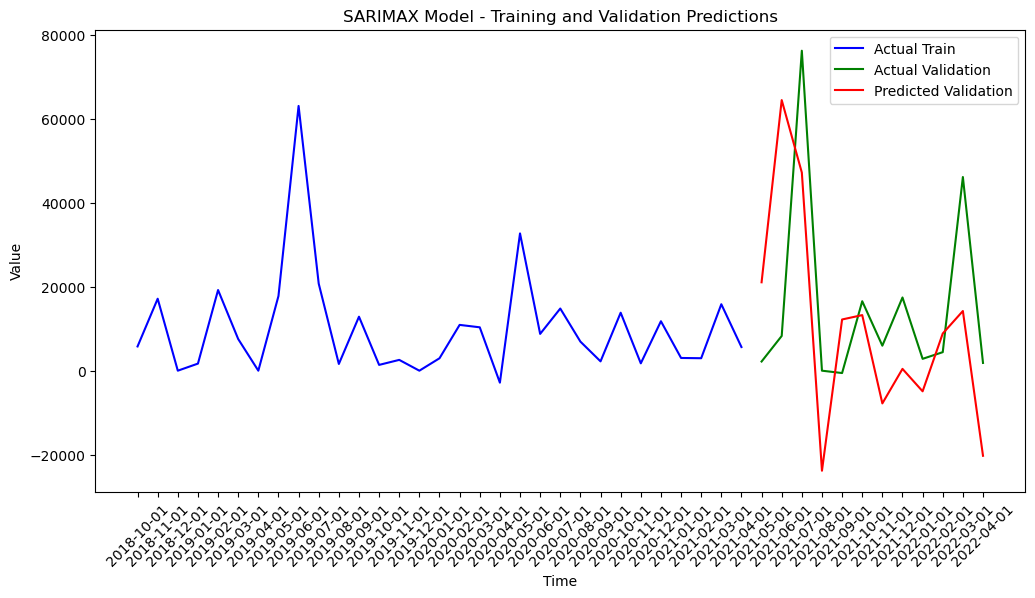

Results appended to ./modelling_csvs/14_results.csv


In [15]:
# Empty dicts
model_fits_sarx = {}
val_preds_sarx = {}
model_summaries_sarx = {}

# SARIMAX for all Product Categ
for target_name, selected_features in u.fs_mm_xgb.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')


    # Only selected features
    X_train_target = X_train_scaled[selected_features] 
    X_val_target = X_val_scaled[selected_features] 

    # Fit the SARIMAX model using fs.stats_models method
    model_fits_sarx[target_number], val_preds_sarx[target_number], model_summaries_sarx[target_number] = fs.stats_models(
        'sarimax', X_train_target, X_val_target, 
        target_train, target_val,
        plot=True,
        csv_path=f'./modelling_csvs/{target_number}_results.csv'
    )

In [37]:
#model_fit_sarx, val_preds_sarx, model_summary_sarx = fs.stats_models('sarimax', X_train, X_val, 
#                                     y_train_1, y_val_1, order=(1,1,3),
#                                     plot = False, 
#                                     csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [83]:
X_future = X_val # temp
future_preds = model_fit_sarx.forecast(steps=len(X_future), exog=X_future)
print(future_preds)


2021-05-01    3.951051e+07
2021-06-01    4.180620e+07
2021-07-01    4.068981e+07
2021-08-01    4.485621e+07
2021-09-01    4.369701e+07
2021-10-01    4.223861e+07
2021-11-01    3.961871e+07
2021-12-01    4.288582e+07
2022-01-01    3.167765e+07
2022-02-01    3.317506e+07
2022-03-01    3.887002e+07
2022-04-01    4.574127e+07
Freq: MS, Name: predicted_mean, dtype: float64


### Prophet

14:25:44 - cmdstanpy - INFO - Chain [1] start processing



 Training model for Product Category 36


14:25:44 - cmdstanpy - INFO - Chain [1] done processing


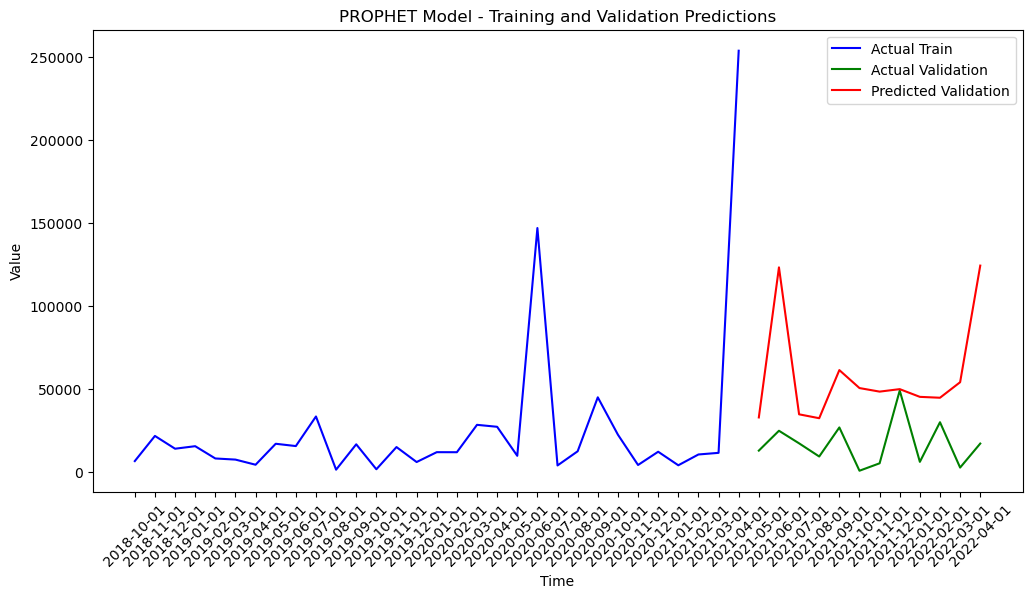

14:25:44 - cmdstanpy - INFO - Chain [1] start processing
14:25:44 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/36_results.csv

 Training model for Product Category 8


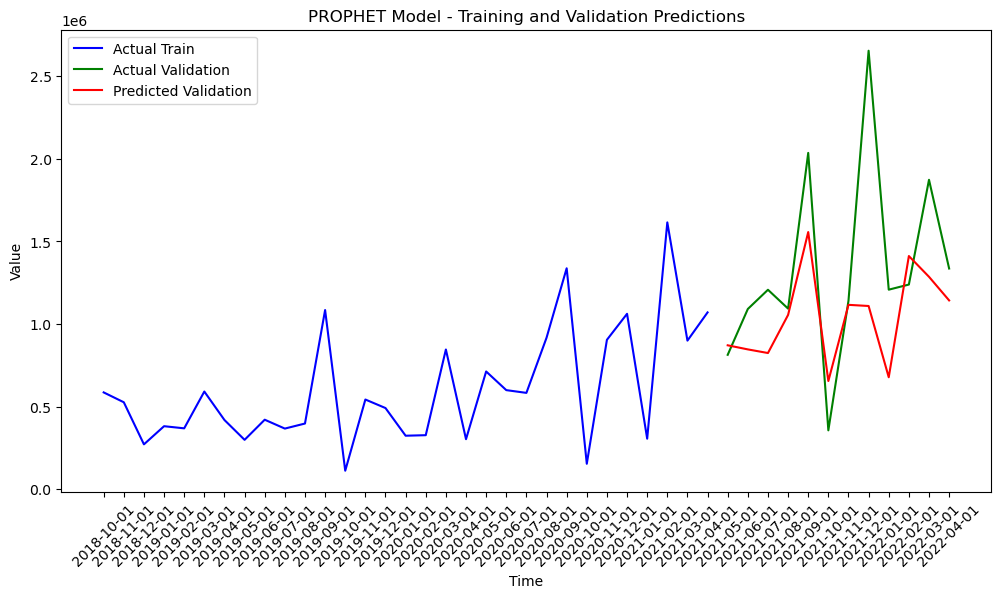

14:25:44 - cmdstanpy - INFO - Chain [1] start processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/8_results.csv

 Training model for Product Category 20


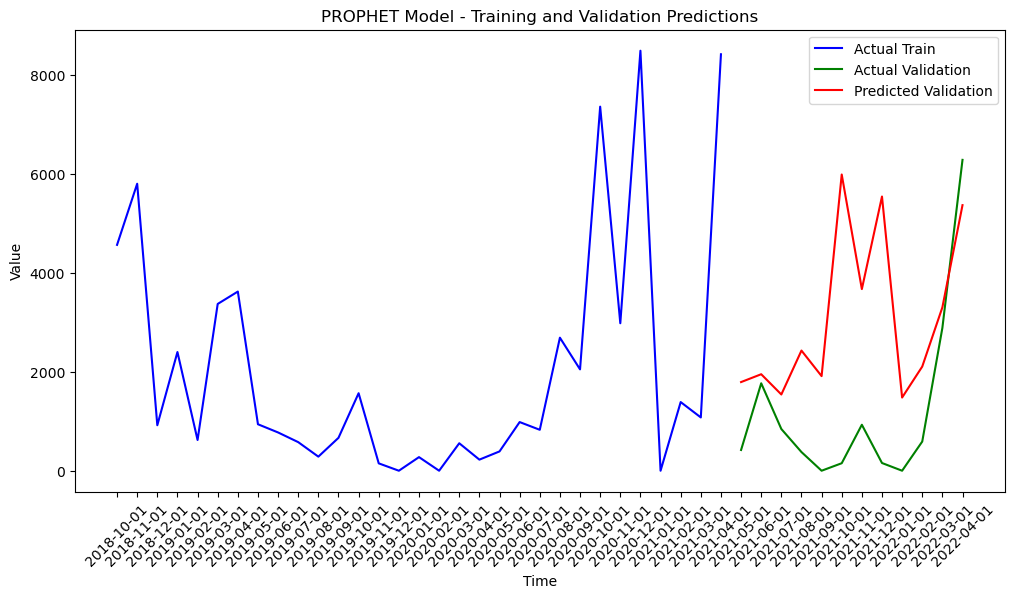

14:25:45 - cmdstanpy - INFO - Chain [1] start processing
14:25:45 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/20_results.csv

 Training model for Product Category 9


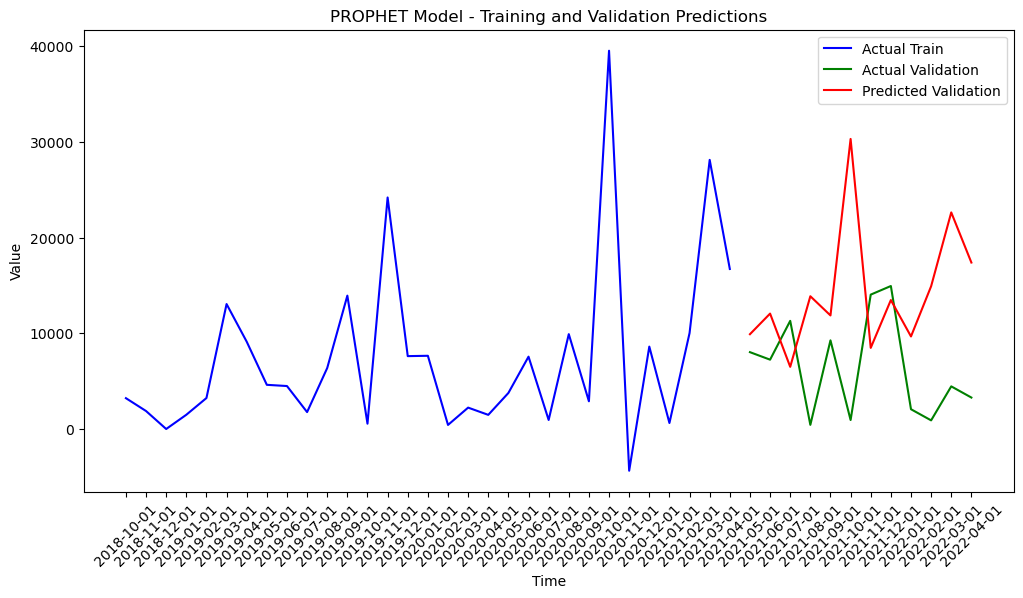

14:25:46 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/9_results.csv

 Training model for Product Category 4


14:25:46 - cmdstanpy - INFO - Chain [1] done processing


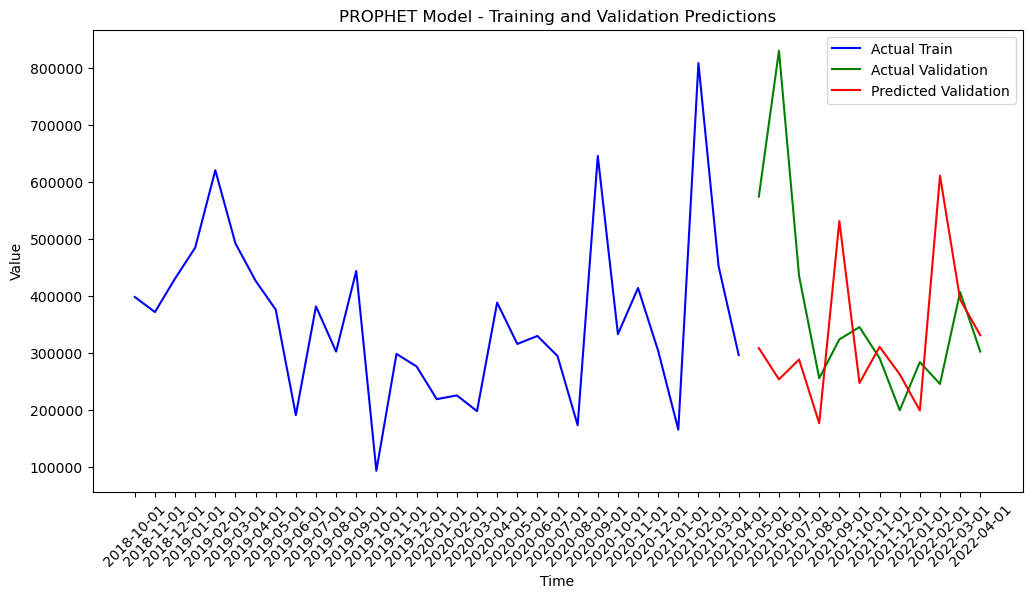

14:25:46 - cmdstanpy - INFO - Chain [1] start processing
14:25:46 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/4_results.csv

 Training model for Product Category 11


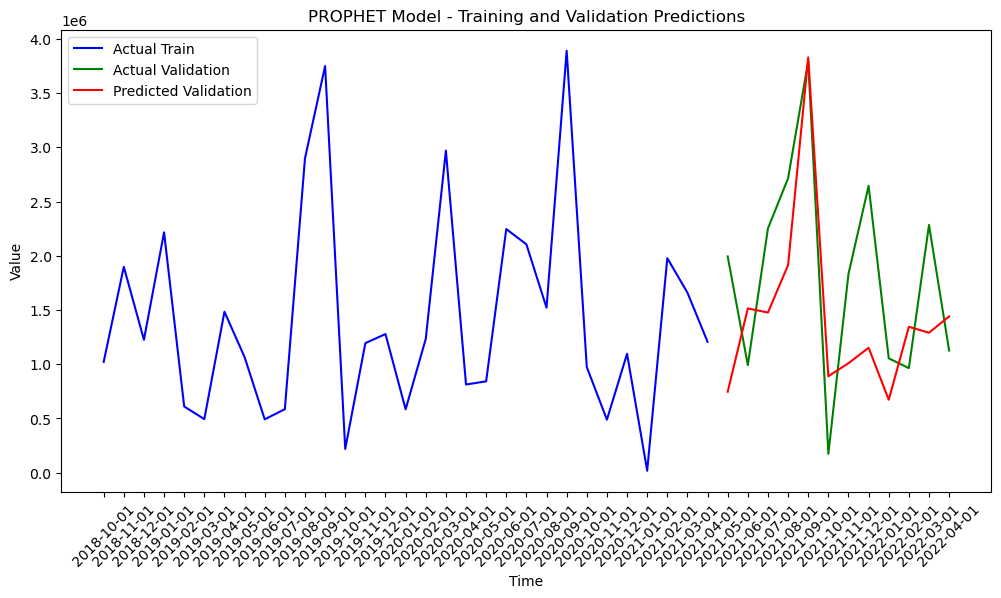

14:25:47 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/11_results.csv

 Training model for Product Category 5


14:25:47 - cmdstanpy - INFO - Chain [1] done processing


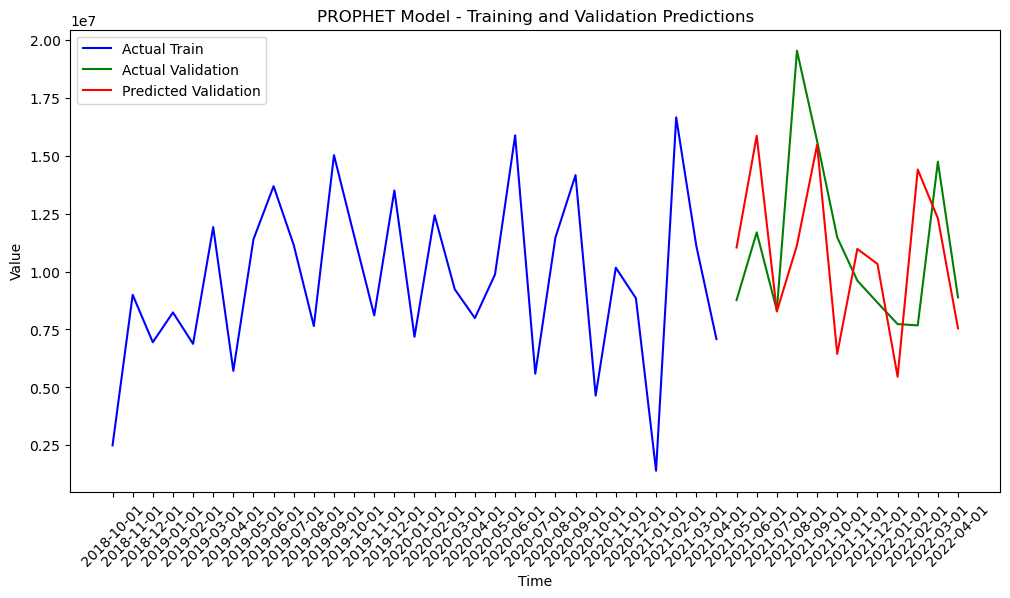

14:25:47 - cmdstanpy - INFO - Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/5_results.csv

 Training model for Product Category 12


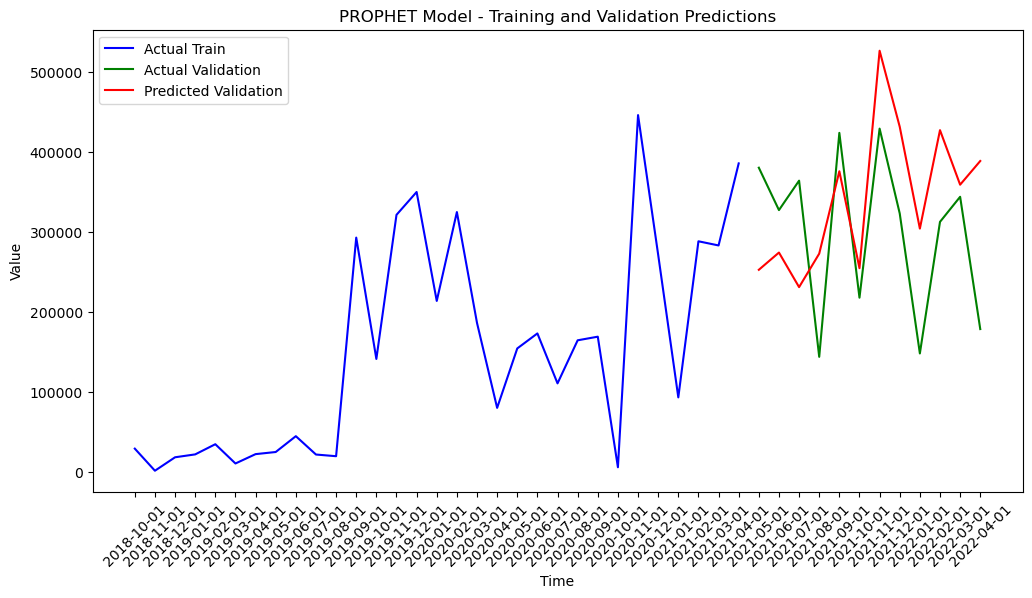

14:25:48 - cmdstanpy - INFO - Chain [1] start processing
14:25:48 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/12_results.csv

 Training model for Product Category 13


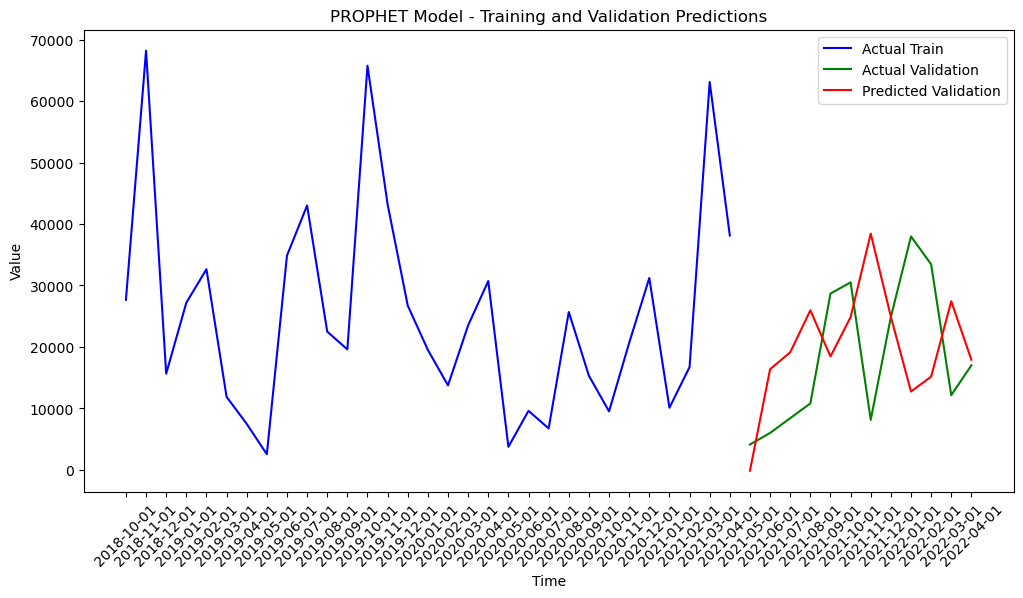

14:25:48 - cmdstanpy - INFO - Chain [1] start processing
14:25:48 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/13_results.csv

 Training model for Product Category 6


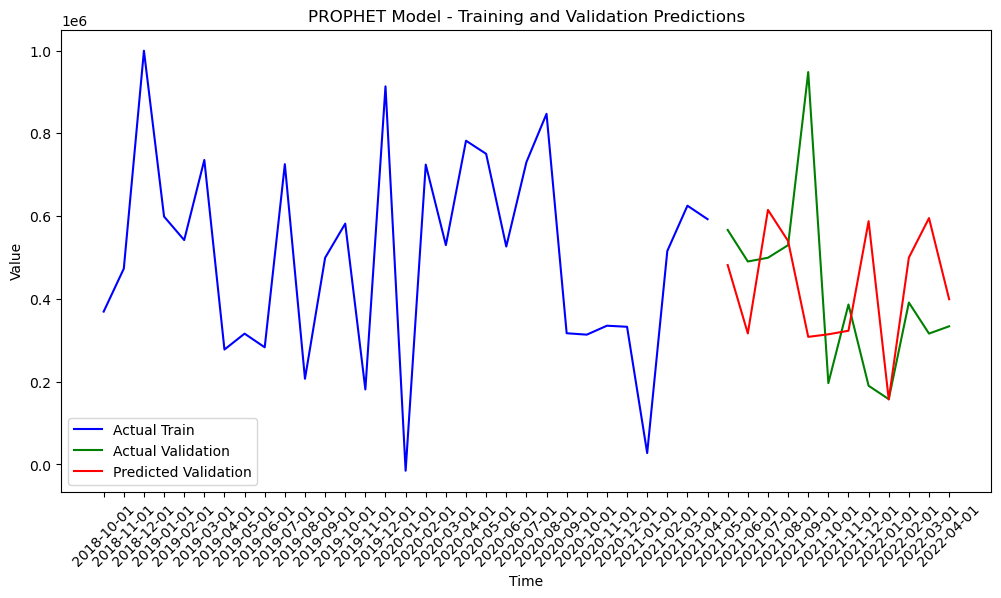

14:25:48 - cmdstanpy - INFO - Chain [1] start processing
14:25:49 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/6_results.csv

 Training model for Product Category 16


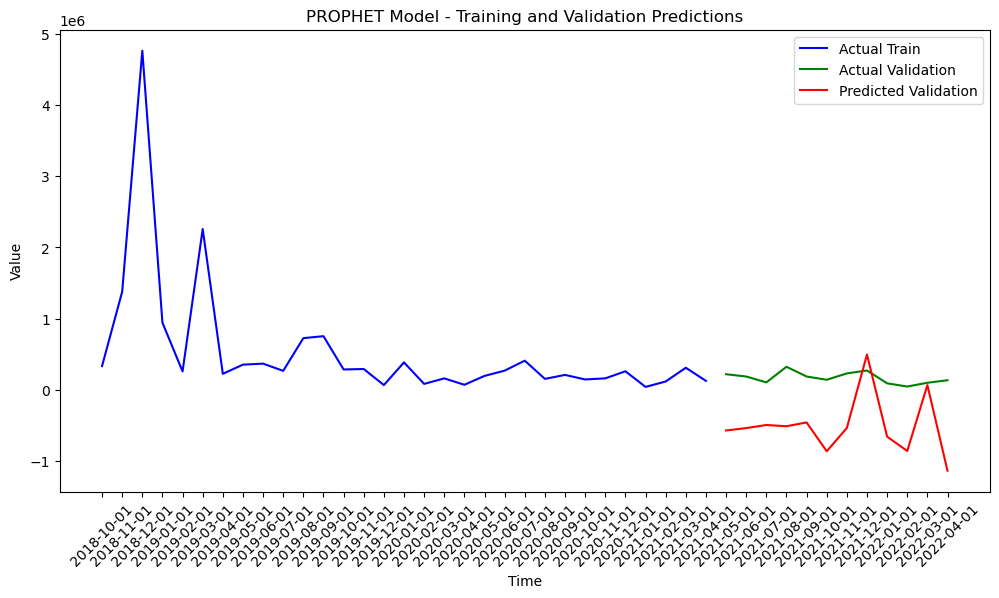

14:25:49 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/16_results.csv

 Training model for Product Category 3


14:25:49 - cmdstanpy - INFO - Chain [1] done processing


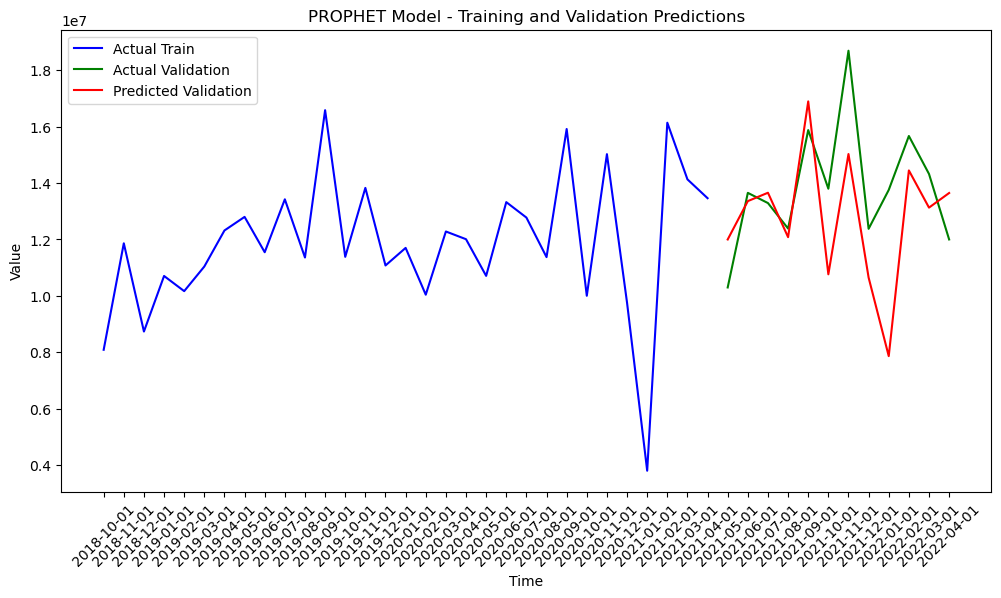

14:25:49 - cmdstanpy - INFO - Chain [1] start processing
14:25:49 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/3_results.csv

 Training model for Product Category 1


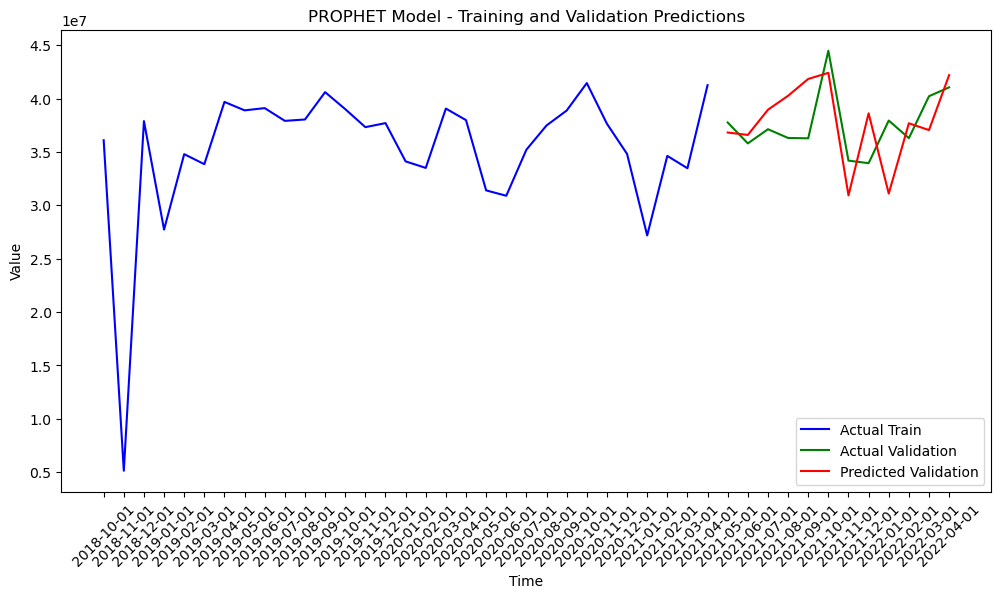

14:25:50 - cmdstanpy - INFO - Chain [1] start processing
14:25:50 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/1_results.csv

 Training model for Product Category 14


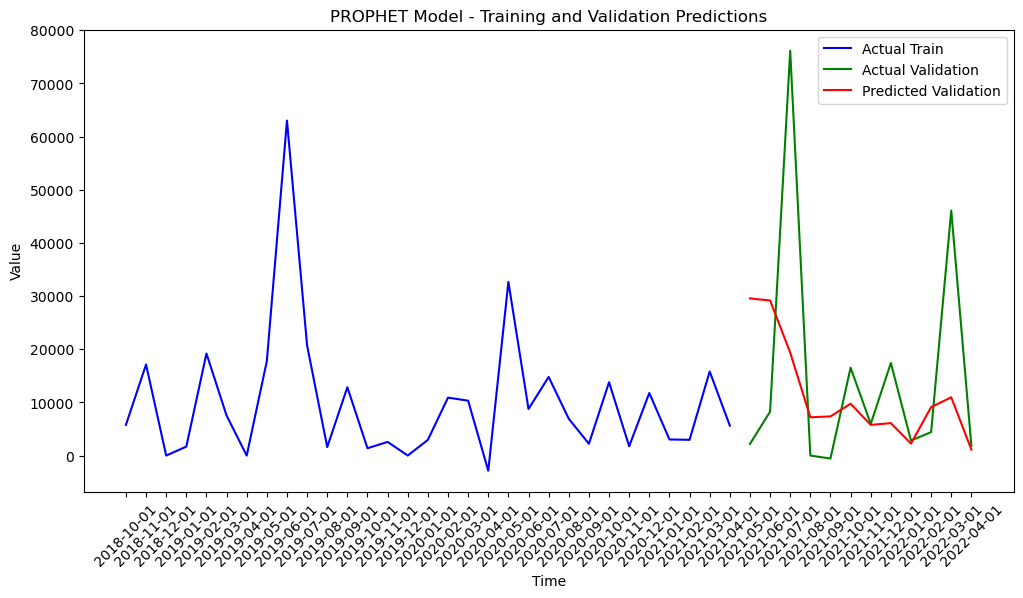

Results appended to ./modelling_csvs/14_results.csv


In [16]:
# Empty dicts
model_fits_p = {}
val_preds_p = {}

# ARIMA for all Product Categ
for target_name, selected_features in u.fs_mm_xgb.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the ARIMA model using fs.stats_models method
    model_fits_p[target_number], val_preds_p[target_number] = fs.stats_models(
        'prophet', X_train_scaled, X_val_scaled, 
        target_train, target_val,
        plot=True,
        csv_path=f'./modelling_csvs/{target_number}_results.csv'
    )

In [17]:
#model_fit_prof, val_preds_prof = fs.stats_models('prophet', X_train, X_val, 
#                                 y_train_1, y_val_1, order=(1,1,3),
#                                 plot = True, 
#                                 csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [80]:
future_dates = pd.date_range(start='2022-04-01', periods=10, freq='M')
future_df = pd.DataFrame({'ds': future_dates})

future_preds = model_fit_prof.predict(future_df) 
print(future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


          ds          yhat    yhat_lower    yhat_upper
0 2022-04-30  4.022729e+07  3.848470e+07  4.212845e+07
1 2022-05-31  4.029798e+07  3.856007e+07  4.212756e+07
2 2022-06-30  3.390558e+07  3.222865e+07  3.577783e+07
3 2022-07-31  3.338732e+07  3.142394e+07  3.518023e+07
4 2022-08-31  3.849076e+07  3.674057e+07  4.030711e+07
5 2022-09-30  3.176397e+07  3.001308e+07  3.356449e+07
6 2022-10-31  3.609832e+07  3.420550e+07  3.788512e+07
7 2022-11-30  4.059999e+07  3.867652e+07  4.257146e+07
8 2022-12-31  3.681564e+07  3.507082e+07  3.857219e+07
9 2023-01-31  2.998908e+07  2.816692e+07  3.178522e+07


### ML Models

In [41]:
from sklearn.base import clone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [54]:
def lazy_regressor(X_train, X_val, target_train, target_val, plot = False, csv_path = None):

    # Fit LazyRegressor
    regressor = LazyRegressor(ignore_warnings=True)
    lazy_model, lazy_predictions = regressor.fit(X_train, X_val, target_train, target_val)

    best_model_name = lazy_model["RMSE"].idxmin()
    best_model_class = regressor.models[best_model_name]

    best_model = clone(best_model_class)
    best_model.fit(X_train, target_train)

    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)
    
    # Metrics
    train_rmse = np.sqrt(mean_squared_error(target_train, train_preds))
    train_mape = mean_absolute_percentage_error(target_train, train_preds) * 100
    
    val_rmse = np.sqrt(mean_squared_error(target_val, val_preds))  
    val_mape = mean_absolute_percentage_error(target_val, val_preds) * 100 

    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(target_train.index, target_train, label='Actual Train', color='blue', alpha=0.7)
        plt.plot(target_val.index, target_val, label='Actual Validation', color='green', alpha=0.7)
        plt.plot(target_val.index, val_preds, label='Predicted Validation', color='red')
        plt.legend()
        plt.title(f'{best_model_name.upper()} Model - Training and Validation Predictions')
        plt.xlabel('Time')
        plt.xticks(rotation=45)
        plt.ylabel('Value')
        plt.show()

    results = {
        "model_type": best_model_name,
        "features_used": X_train.columns.tolist(),
        "train_rmse": train_rmse,
        "val_rmse": val_rmse,
        "train_mape (%)": train_mape,
        "val_mape (%)": val_mape
        }

    if csv_path:
        results_df = pd.DataFrame([results])
        
        # Check if file exists to determine mode
        if os.path.exists(csv_path):
            results_df.to_csv(csv_path, mode='a', header=False, index=False)
        else:
            results_df.to_csv(csv_path, mode='w', header=True, index=False)
        
        print(f"Results appended to {csv_path}")

    return best_model, val_preds

In [55]:
y_train_list

['y_train_36',
 'y_train_8',
 'y_train_20',
 'y_train_9',
 'y_train_4',
 'y_train_11',
 'y_train_5',
 'y_train_12',
 'y_train_13',
 'y_train_6',
 'y_train_16',
 'y_train_3',
 'y_train_1',
 'y_train_14']

100%|███████████████████████| 42/42 [00:01<00:00, 22.01it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 1421567.383065
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

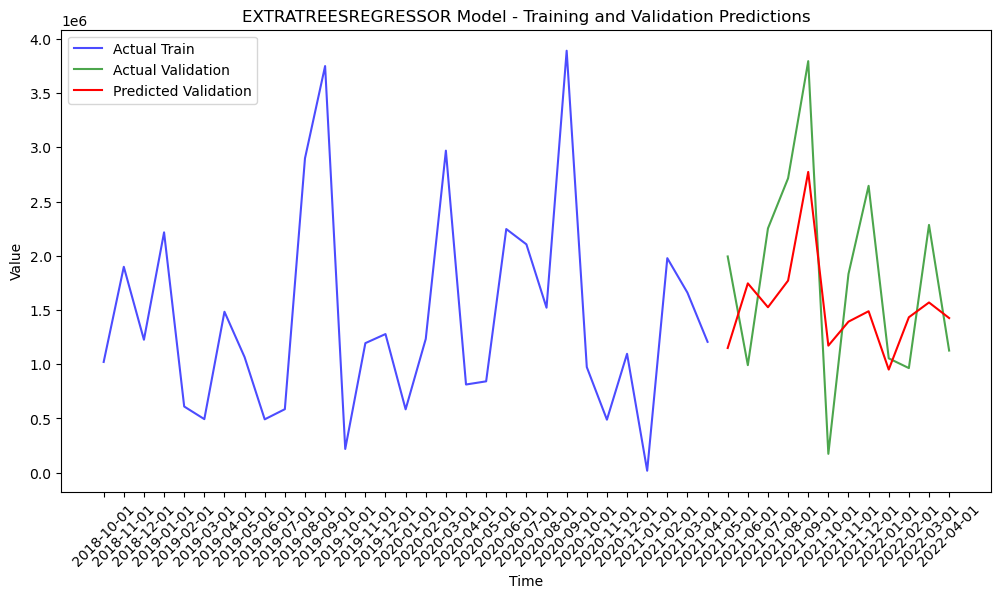

In [75]:
model_, preds_ = lazy_regressor(X_train_scaled, X_val_scaled, 
               y_train_11, 
               y_val_11, plot = True, 
               csv_path = None)

In [74]:
u.fs_mm_xgb

{'y_train_36': ['#14_Lag_1', '#9_Lag_1', '#4_Lag_1'],
 'y_train_8': ['#36_Lag_1',
  'stock_price_change',
  'CHI Production Index',
  'SWI Production Index',
  '#36_Lag_12'],
 'y_train_20': ['#36_RollingMean_12', '#12_Lag_1', 'BC_CHI'],
 'y_train_9': ['#20_Lag_1', '#36_Lag_1', '#4_Lag_1', '#13_Lag_1'],
 'y_train_4': ['#12_Lag_12',
  'Buildings_Ger',
  'GER Production Index',
  '#12_RollingMean_3',
  '#3_Lag_1',
  '#1_Lag_1',
  'FRA Production Index',
  'BC_GER',
  '(W) Price of Base Metals',
  '#4_RollingMean_6',
  '#16_RollingMean_3'],
 'y_train_11': ['#3_Lag_1',
  '#14_Lag_1',
  'UK EE Producer Prices',
  'Fossil_Ita'],
 'y_train_5': ['#1_Lag_1',
  'Fossil_Swi',
  '#20_Lag_1',
  'Fossil_US',
  'TotalDaysInMonth',
  'Fossil_UK'],
 'y_train_12': ['#9_Lag_1',
  '#12_RollingMean_3',
  '#6_Lag_1',
  '#9_RollingMean_12',
  'Clean_Fra',
  '#20_Lag_1'],
 'y_train_13': ['#8_Lag_3', 'Clean_UK', '#13_RollingMean_3', 'Clean_US'],
 'y_train_6': ['Clean_Ita',
  'Fossil_Fra',
  '#20_Lag_1',
  '#13_

WORKING
STILL WORKING


100%|███████████████████████| 42/42 [00:00<00:00, 44.94it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 25734.125630
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

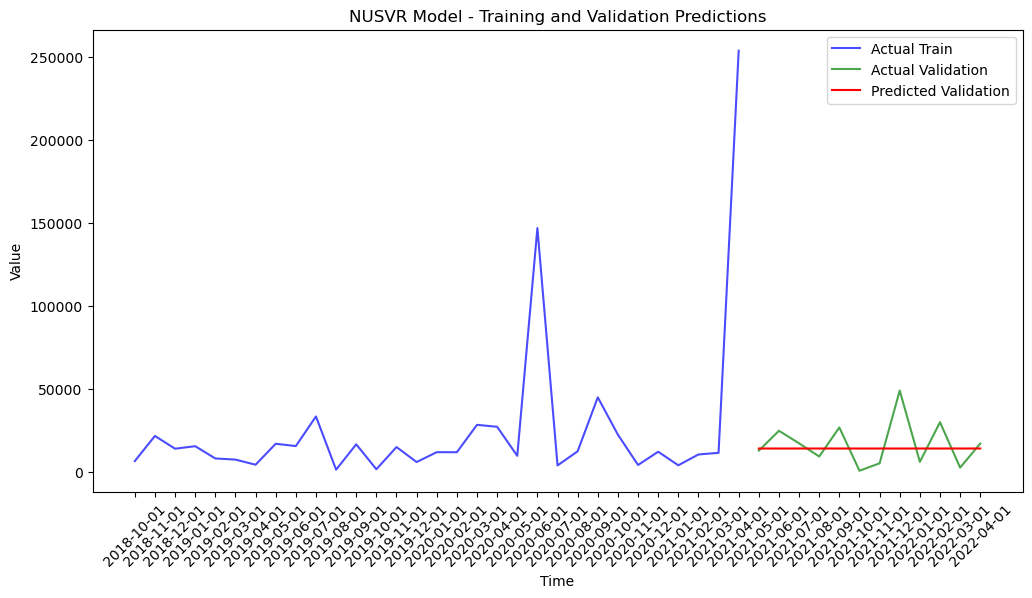

Results appended to ./modelling_csvs/36_results.csv
WORKING
STILL WORKING


100%|███████████████████████| 42/42 [00:01<00:00, 40.24it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 607096.789819
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

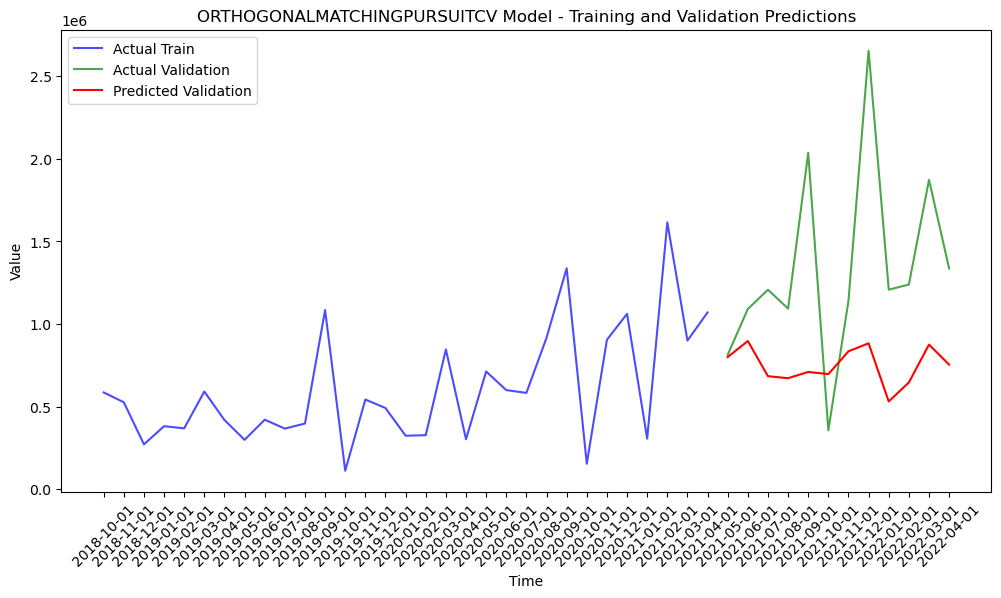

Results appended to ./modelling_csvs/8_results.csv
WORKING
STILL WORKING


100%|███████████████████████| 42/42 [00:01<00:00, 41.82it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 2062.238703
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

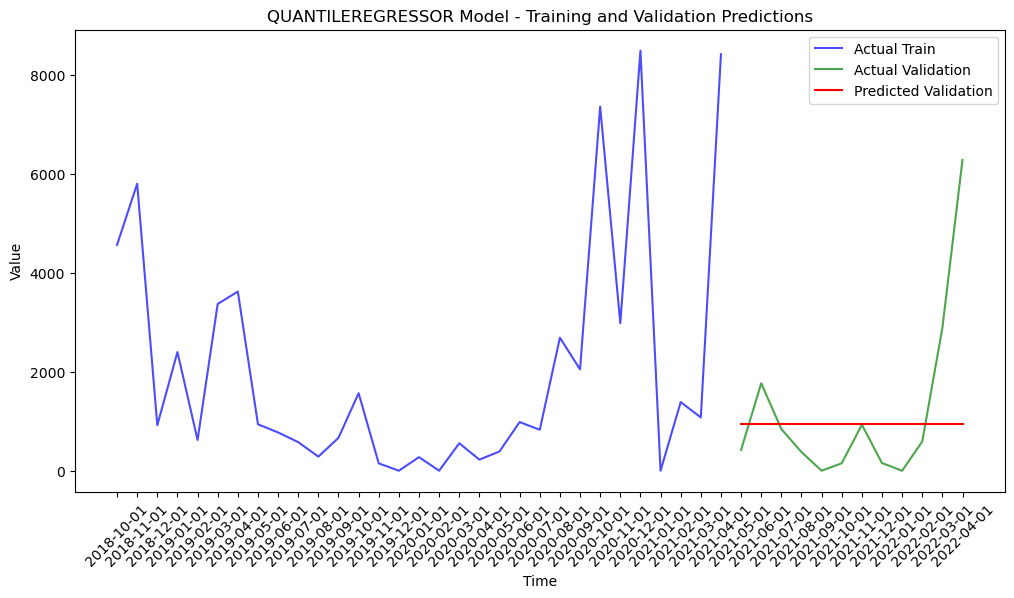

Results appended to ./modelling_csvs/20_results.csv
WORKING
STILL WORKING


100%|███████████████████████| 42/42 [00:01<00:00, 39.00it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 7470.358191
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

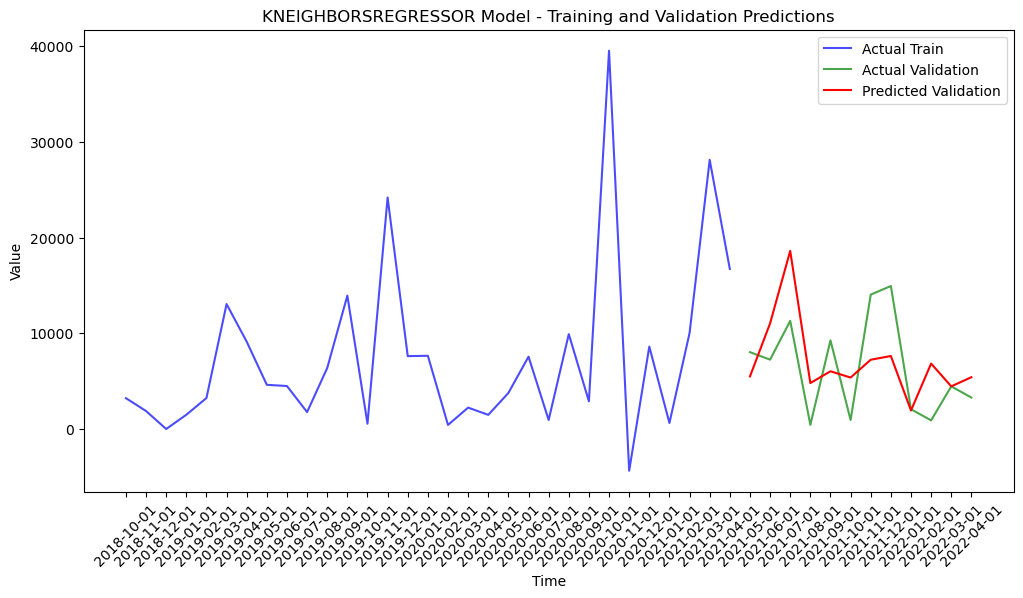

Results appended to ./modelling_csvs/9_results.csv
WORKING
STILL WORKING


100%|███████████████████████| 42/42 [00:00<00:00, 42.05it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 359307.160534
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

ValueError: attempt to get argmin of an empty sequence

In [77]:
# Empty Dicts
lazy_models = {}
lazy_preds = {}

for target_name, selected_features in u.fs_mm_xgb.items():
    print('WORKING')
    
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    print('STILL WORKING')

    target_number = target_name.split('_')[-1]

    X_train_target = X_train_scaled[selected_features]
    X_val_target = X_val_scaled[selected_features]
    lazy_models[target_number], lazy_preds[target_number] = lazy_regressor(
        X_train_target, X_val_target, 
        target_train, target_val, 
        plot=True, 
        csv_path=f'./modelling_csvs/{target_number}_results.csv')


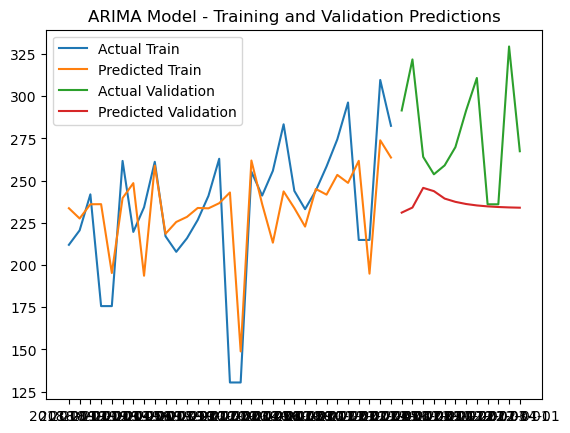

In [208]:
# Plot the training predictions
plt.plot(X_train.index, X_train[a], label='Actual Train')
plt.plot(X_train.index, train_preds, label='Predicted Train')

# Plot the validation predictions
plt.plot(X_val.index, X_val[a], label='Actual Validation')
plt.plot(X_val.index, val_preds, label='Predicted Validation')

plt.legend()
plt.title('ARIMA Model - Training and Validation Predictions')
plt.show()


Unnamed: 0           #1
0   2018-10-01  36098918.79
1   2018-11-01  37482085.58
2   2018-12-01  37889612.12
3   2019-01-01  27728148.35
4   2019-02-01  34793163.53
5   2019-03-01  33856803.04
6   2019-04-01  39688292.01
7   2019-05-01  38897974.29
8   2019-06-01  39106750.23
9   2019-07-01  37912572.30
10  2019-08-01  38042677.05
11  2019-09-01  40602780.64
12  2019-10-01  39012299.19
13  2019-11-01  37323903.07
14  2019-12-01  37701509.37
15  2020-01-01  34116651.47
16  2020-02-01  33505879.26
17  2020-03-01  39064430.88
18  2020-04-01  37981531.32
19  2020-05-01  31400212.54
20  2020-06-01  30896804.07
21  2020-07-01  35212730.13
22  2020-08-01  37482085.58
23  2020-09-01  38879360.20
24  2020-10-01  41453854.50
25  2020-11-01  37643611.57
26  2020-12-01  34816959.18
27  2021-01-01  27180432.94
28  2021-02-01  34630522.81
29  2021-03-01  33476138.64
30  2021-04-01  41257397.90

In [47]:
import pandas as pd
import numpy as np
import os
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.utils import all_estimators

def modelling(X_train, y_train, X_test, y_test, 
              features_used, 
              metric='RMSE', 
              model_choice='arima', 
              save_filename=None):

    save_folder = './modelling_csvs'
    if save_filename is None:
        raise ValueError('Need to name save file')
    else:
        save_path = os.path.join(save_folder, save_filename)

    if model_choice == 'arima':
        if len(features_used) > 1:
            raise ValueError('ARIMA only accepts 1 feature for the target variable.')

        model = ARIMA(y_train, order=(1, 1, 1))
        model_fit = model.fit()

        # Train RMSE (in-sample prediction)
        train_predictions = model_fit.predict(start=0, end=len(y_train)-1, dynamic=False)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

        # Test RMSE
        predictions = model_fit.forecast(len(y_test))
        val_rmse = np.sqrt(mean_squared_error(y_test, predictions))

        best_model_name = 'ARIMA'
        best_score = val_rmse

        print(f'ARIMA Train RMSE: {train_rmse}')
        print(f'ARIMA Validation RMSE: {val_rmse}')

        
    elif model_choice == 'lazy':
        regressor = LazyRegressor(verbose=0)
        models, _ = regressor.fit(X_train[features_used], X_test[features_used], y_train, y_test)

        best_model_name = models.sort_values(by=metric).iloc[0].name
        
        regressors = dict(all_estimators(type_filter='regressor'))
        model = regressors[best_model_name]()

        model.fit(X_train[features_used], y_train)

        train_preds = model.predict(X_train[features_used])
        test_preds = model.predict(X_test[features_used])

        train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
        val_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

        best_score = val_rmse

        print(f'Best model: {best_model_name}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Validation RMSE: {val_rmse}')

    elif model_choice == 'prophet':
        raise ValueError('NOT WORKING YET')

    result_row = {
        'Features Used': ', '.join(features_used),
        'Best Model': best_model_name,
        'Train RMSE': train_rmse,
        'Validation RMSE': val_rmse
    }

    results_df = pd.DataFrame([result_row])
    results_df.to_csv(save_path, mode='a', header=not os.path.isfile(save_path), index=False)

    return best_model_name, train_rmse, val_rmse



In [49]:
best_model_name, best_score_train, best_score_val  = modelling(X_train_scaled, y_train_1, X_val_scaled, y_val_1, 
              features_used=selected_features, 
              metric='RMSE', 
              model_choice='lazy',
              save_filename = 'categ1_new.csv')

100%|████████████████████████████████████████| 42/42 [00:01<00:00, 29.55it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 36294712.838710
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [46]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error

def prophet_forecast(X_train, y_train, features_used, periods=10, freq='MS'):
    """
    Function to perform forecasting using Prophet for each feature in 'features_used'.

    Parameters:
    - X_train: DataFrame containing the training data
    - y_train: Actual ground truth values for RMSE calculation (training data)
    - features_used: List of features/columns to forecast using Prophet
    - periods: Number of future periods to predict (default=10)
    - freq: Frequency of the periods (default='MS' for monthly start)

    Returns:
    - best_model_name: Name of the best model ('prophet')
    - best_score: The lowest RMSE score for the model
    """
    best_score = float('inf')
    best_model_name = None

    # Initialize an empty DataFrame to hold future feature values
    future_features = pd.DataFrame()

    # Iterate through each column in 'features_used'
    for column in features_used:
        # Isolate the current column into a new DataFrame 'df1'
        df1 = X_train[[column]].copy()

        # Reset the index of 'df1' and rename columns to fit Prophet's expected format
        data = (df1.reset_index()
                .rename(columns={'index': 'ds', f'{column}': 'y'}))

        # Initialize Prophet model
        model = Prophet()

        # Fit the model to the data
        model.fit(data)

        # Create a DataFrame representing future dates to make predictions
        future = model.make_future_dataframe(periods=periods, freq=freq)

        # Forecast future dates
        forecast_index = model.predict(future)

        # Select relevant columns ('ds' for date, 'yhat' for predictions)
        forecast_index = forecast_index[['ds', 'yhat']]

        # Set the date column as the index
        forecast_index = forecast_index.set_index('ds')

        # Add the forecasted values to the 'future_features' DataFrame
        future_features[column] = forecast_index['yhat'].values

    # Reset the index of the future_features DataFrame to use 'ds' as a regular column
    future_features.reset_index(inplace=True)

    # Add the date column to 'future_features'
    future_features['ds'] = forecast_index.index.values

    # Set 'ds' as the index of 'future_features'
    future_features.set_index('ds', inplace=True)

    # Ensure we only compare the forecasted values against a valid subset of y_train
    # For simplicity, we will compare the mean of the forecasted values to the corresponding `y_train` values
    predicted_values = future_features[features_used].mean(axis=1)  # For simplicity, take the mean of all predictions

    rmse = mean_squared_error(y_train, predicted_values)

    # Compare RMSE to get the best model
    if rmse < best_score:
        best_score = rmse
        best_model_name = 'prophet'

    return best_model_name, best_score


In [47]:
prophet_forecast(X_train_1_scaled, y_train_1, selected_features) 

11:44:03 - cmdstanpy - INFO - Chain [1] start processing
11:44:03 - cmdstanpy - INFO - Chain [1] done processing
11:44:03 - cmdstanpy - INFO - Chain [1] start processing
11:44:03 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Found input variables with inconsistent numbers of samples: [31, 41]

In [34]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp313-cp313-macosx_10_13_x86_64.whl (10.2 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [42]:
X_train_1_selected = X_train_1_scaled[selected_features]
X_val_1_selected = X_val_1_scaled[selected_features]

best_model_name, best_score = modelling(
    X_train_1_selected, y_train_1, X_val_1_selected, y_val_1, 
    features_used=selected_features, metric='RMSE'
)

100%|██████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 34.63it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 36289610.258065
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [67]:
# import lazypredict
# from lazypredict.Supervised import LazyRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# def lazy_regressor(X_train, y_train, X_test, y_test, metric='RMSE'):
    
#     # Initialize LazyRegressor
#     regressor = LazyRegressor(verbose=0)
    
#     # Fit the model
#     models, predictions = regressor.fit(X_train, X_test, y_train, y_test)
    
#     # Select the best model based on the metric (e.g., RMSE)
#     best_model = models.sort_values(by=metric).iloc[0]
    
#     # Get the model name and the best score
#     best_model_name = best_model.name
#     best_score = best_model[metric]
    
#     print(f'Best model: {best_model_name}')
#     print(f'{metric} of the best model: {best_score}')
    
#     # Return the best model and score
#     return best_model_name, best_score


In [68]:
# best_model_name, best_score = lazy_regressor(X_train_1_scaled, y_train_1,
#                                              X_val_1_scaled, y_val_1,
#                                              metric='RMSE')


100%|████████████████████████████████████| 42/42 [00:02<00:00, 17.66it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 36289610.258065
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [43]:
file = pd.read_csv('./lazy_regressor_results.csv')
file

Features Used      Best Model  \
0  (W) Price of Base Metals, GER Production Index...             SVR   
1                 USA Shipments Index_Rolling_Mean_3  HuberRegressor   
2  BC_CHI, USA Shipments Index_Rolling_Mean_3, CH...  HuberRegressor   
3  (W) Price of Base Metals, GER Production Index...             SVR   
4  (W) Price of Natural gas index, USA Production...             SVR   

        RMSE  
0 2887703.96  
1 2823366.38  
2 2830173.62  
3 2887703.92  
4 2887703.88

In [75]:
from autosklearn.experimental.askl2 import ForecasterAutoregMultiSeries
from sklearn.metrics import mean_squared_error
import numpy as np

def time_series_forecasting(X_train, y_train, X_test, y_test, 
                            forecast_steps=10, metric='neg_root_mean_squared_error'):

    # Initialize ForecasterAutoregMultiSeries
    forecaster = ForecasterAutoregMultiSeries(steps=forecast_steps, metric=metric)
    
    # Fit the forecaster with training data
    forecaster.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = forecaster.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Test RMSE: {rmse}')
    
    return forecaster, y_pred, rmse


ModuleNotFoundError: No module named 'autosklearn'

## Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model using the training data
model.fit(X_train_1_scaled, y_train_1)

# Make predictions on the validation set
y_pred_val_1 = model.predict(X_val_1_scaled)

# Calculate RMSE for the validation set
rmse_val_1 = np.sqrt(mean_squared_error(y_val_1, y_pred_val_1))
print(f'Root Mean Squared Error on Validation Set: {rmse_val_1}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y_val_1.index, y_val_1, label='Actual Validation Values', linestyle='-', color='g')
plt.plot(y_val_1.index, y_pred_val_1, label='Predicted Validation Values', linestyle='--', color='g')

plt.plot(y_train_1.index, y_train_1, label='Actual Training Values', linestyle='-', color='b')

plt.xlabel('Date/Time')
plt.ylabel('Sales')
plt.title('XGBoost Forecasting: Actual vs Predicted (Training and Validation)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
